# Deriving scaling factor b/w our inferred MoCHI additive terms and experimentally measured ddEa values


In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


# for plotting
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
results_dir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Doubles_analysis/all_vars_analysis/mochi_results/'

In [4]:
# l2 regularisation factor value, 19.02.2024 run including all 3 doubles datasets
l2_regularisation_factor_value = '1e-05'

transformations = ['Sigmoid'] 


# Looking at weights of trained models

In [5]:
# read in MoCHI results

weights_Nucleation = {}

for transformation in transformations: 
    print(transformation)
        
    curr_path = results_dir + '20240219_max_terms_order_1_' + transformation + '_l2_regularization_factor_1e-05_all_3_doubles_datasets_all_variants'       

    weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value] = pd.read_csv(curr_path + '/weights/weights_Nucleation.txt',
                                sep='\t')
    weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value]['ddEa'] = - weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value]['mean_kcal/mol']


Sigmoid


In [6]:
# table of all possible 20 aa in all possible Ab (42) positions

AB_WT = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"
all_aa = ["G","A","V","L","M","I","F","Y","W","K","R","D","E","S","T","C","N","Q","H", "P", "*"]

ddE_df_mean_kcalmol = {}

for transformation in transformations:
    #print(transformation)
    ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [7]:
# populate the ddE_df table according to weights_Nucleation

for transformation in transformations:

    for idx in list(weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].index):

        curr_mutation_id = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'id']

        # continue if not WT
        if curr_mutation_id != 'WT':
            # position (1-42) of mutation in Ab sequence
            curr_mutation_pos = curr_mutation_id[1:-1]
            # aa introduced by the mutation
            curr_new_aa = curr_mutation_id[-1]

            # inferred value of ddEa to be added
            curr_ddEa_value = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'ddEa']

            # minus because we have -ddEa predicted
            ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value].loc[curr_new_aa, list(ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_value


In [8]:
# add mean and put it at the top
previous_rows = list(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].index)
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc['mean'] = ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc[all_aa[:-1],:].mean()
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'] = ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc[['mean'] + previous_rows]

In [9]:
# make sure values are float
for transformation in transformations:
    for col in list(ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value].columns):
        ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value][col] = ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value][col].astype(float)


In [10]:
cmaps_ddE = {}
masks_ddE = {}

for transformation in transformations:
    #print(transformation)
    masks_ddE[transformation + '_l2_' + l2_regularisation_factor_value] = ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value].isnull()

    cmaps_ddE[transformation + '_l2_' + l2_regularisation_factor_value] = matplotlib.colormaps.get('RdBu_r')
    cmaps_ddE[transformation + '_l2_' + l2_regularisation_factor_value].set_bad("lightgrey")

In [11]:
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05']

,D-1,A-2,E-3,F-4,R-5,H-6,D-7,S-8,G-9,Y-10,...,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
mean,0.103882,0.169429,0.021102,0.176237,0.296481,0.211324,0.029089,0.103659,0.074594,0.065320,...,0.763549,0.583862,1.144036,0.555530,1.646459,1.101836,0.930434,1.044665,0.907684,0.267220
G,-0.119701,0.059928,-0.122183,0.155388,0.273210,0.125394,-0.088484,0.011455,NaN,-0.035645,...,NaN,1.394856,1.322565,0.966701,NaN,NaN,1.783354,1.331486,1.539978,0.607499
A,-0.034429,NaN,-0.072107,0.118129,0.299875,0.163768,-0.000684,0.066319,0.048261,-0.001086,...,0.962295,0.704062,1.197584,0.641576,1.058879,1.086309,1.139098,1.244563,1.546236,NaN
V,0.461832,0.432284,0.340384,0.214031,0.269688,0.284629,0.231658,0.179811,0.103366,0.093800,...,1.145424,-0.171591,0.479416,NaN,1.285608,1.121802,NaN,NaN,0.815993,-0.161447
L,0.641402,0.563584,0.529227,0.266033,0.376285,0.432850,0.255755,0.160883,0.300386,0.313313,...,0.936964,NaN,1.038536,-0.072776,2.156709,1.669760,0.577498,0.815200,0.572480,-0.620313
M,0.196217,0.272486,0.069836,0.146869,0.258301,0.188453,0.049938,0.061914,0.118189,0.209153,...,0.323637,0.053965,NaN,0.056243,1.927560,1.351779,0.560566,0.896312,0.665332,-0.479129
I,0.603542,0.506125,0.361030,0.182046,0.288060,0.424054,0.236218,0.258268,0.116144,0.146601,...,1.370139,-0.310746,0.709471,-0.191319,1.834677,1.362958,-0.035779,0.418822,NaN,-0.162904
F,0.111876,0.029937,-0.058595,NaN,0.324749,0.198976,0.068263,0.064392,-0.042781,0.028365,...,0.852814,0.273586,1.504866,0.058850,2.004759,1.483052,0.809109,0.579608,-0.088316,-0.041485
Y,0.096262,0.066753,-0.071505,0.080424,0.341684,0.194762,0.065374,0.043734,-0.166671,NaN,...,0.788747,0.598253,1.089803,0.177152,1.790839,1.653306,0.851876,0.286320,0.140005,0.574368
W,0.214893,0.046681,-0.167809,0.182460,0.332840,0.138308,0.028336,0.021277,0.098096,0.170297,...,1.460660,1.142606,1.257964,1.262330,2.096475,1.958122,1.583703,1.504526,0.620594,0.888338


Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

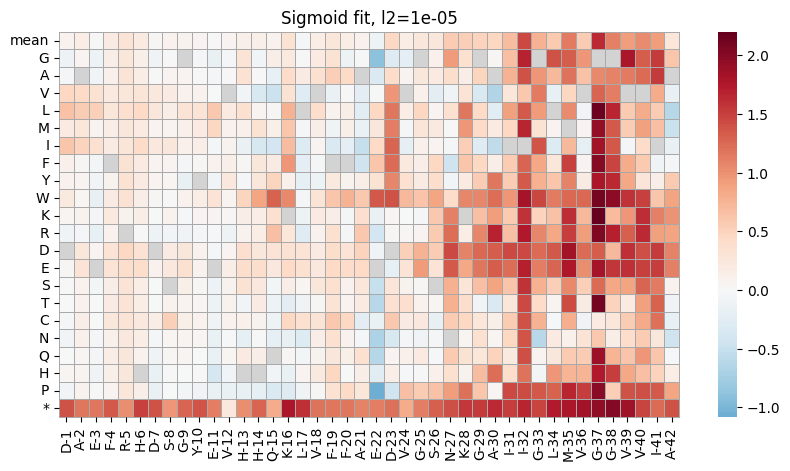

In [12]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(ddE_df_mean_kcalmol[transformation + '_l2_1e-05'], cmap=cmaps_ddE[transformation + '_l2_1e-05'], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_ddE[transformation + '_l2_1e-05'],
            linewidths=0.5, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title(transformation + ' fit, l2=1e-05')

#plt.savefig('./figures/20240502_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid_l2_1e-05.pdf',
#           bbox_inches = 'tight')

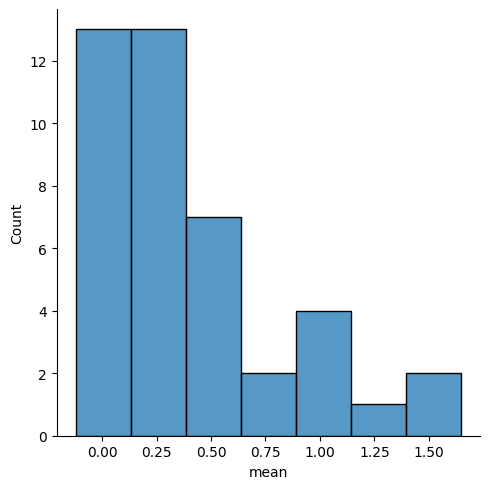

In [13]:
sns.displot(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc['mean'])

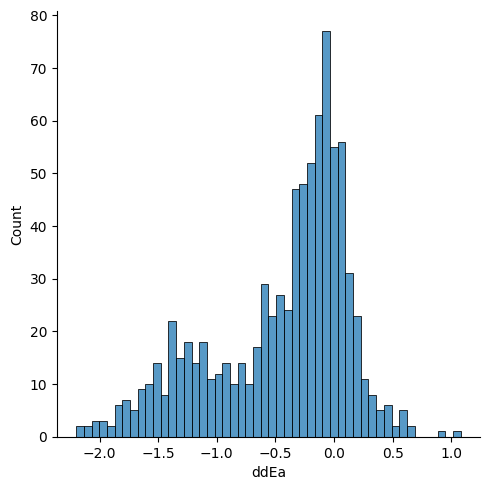

In [14]:
# side task - how many mutations are significantly affecting ddEa? (where ddEa significantly > or < 0)

sns.displot(-weights_Nucleation['Sigmoid_l2_1e-05'][1:]['ddEa'], bins=50)

In [15]:
weights_Nucleation['Sigmoid_l2_1e-05']

,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,...,fold_10,n,mean,std,ci95,trait_name,mean_kcal/mol,std_kcal/mol,ci95_kcal/mol,ddEa
0,WT,WT,NaN,NaN,0.371381,0.391369,0.357266,0.348474,0.372521,0.341733,...,0.356986,10,0.362616,0.014747,0.057808,Nucleation,0.218317,0.008879,0.034804,-0.218317
1,D1*,D1*,1.0,1.0,-2.213683,-2.545237,-2.185623,-2.583970,-2.320398,-2.029718,...,-2.080908,10,-2.322225,0.270011,1.058444,Nucleation,-1.398121,0.162563,0.637248,1.398121
2,D1A,D1A,1.0,1.0,0.047495,0.067011,0.077061,0.008786,0.037928,0.066478,...,0.099418,10,0.057185,0.026726,0.104765,Nucleation,0.034429,0.016091,0.063075,-0.034429
3,D1C,D1C,1.0,1.0,0.020790,-0.018463,0.064381,0.025494,0.063339,0.093359,...,0.044598,10,0.055521,0.038954,0.152699,Nucleation,0.033427,0.023453,0.091934,-0.033427
4,D1E,D1E,1.0,1.0,-0.053183,-0.059048,-0.048736,-0.055957,-0.051849,-0.058691,...,-0.064017,10,-0.056081,0.007176,0.028130,Nucleation,-0.033764,0.004320,0.016936,0.033764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,A42T,A42T,42.0,42.0,0.145117,0.149020,0.219678,0.186265,0.082041,0.077438,...,0.257585,10,0.161254,0.057718,0.226253,Nucleation,0.097084,0.034749,0.136218,-0.097084
837,A42V,A42V,42.0,42.0,0.229532,0.334067,0.283984,0.229813,0.256938,0.260202,...,0.279617,10,0.268158,0.036916,0.144711,Nucleation,0.161447,0.022226,0.087125,-0.161447
838,A42W,A42W,42.0,42.0,-1.611651,-1.768430,-1.426433,-1.168376,-1.707580,-1.035545,...,-1.233302,10,-1.475495,0.282040,1.105598,Nucleation,-0.888338,0.169805,0.665637,0.888338
839,A42Y,A42Y,42.0,42.0,-0.916438,-0.897971,-1.026022,-1.039680,-1.146212,-0.833155,...,-0.952950,10,-0.954003,0.116918,0.458318,Nucleation,-0.574368,0.070392,0.275936,0.574368


In [16]:
scipy.stats.mode((np.round(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa'], 1)))[0]

0.1

# Read in fitness values (growth rates [GR] or nucleation scores [NS]) for all variants used for MoCHI training

In [17]:
# eLife_doubles - shallow double mutants
# NNK_doubles - C-terminal double mutants
# Nicking_doubles - N-terminal double mutants

datasets = ['eLife_doubles','NNK_doubles','Nicking_doubles']


In [18]:
# produced and saved in notebook M0 in this directory

corrected_files_dir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Previous_files_from_Mireia/Doubles_datasets/dimsum_outputs/corrected_fitness_abundance_files_Anna/'

all_variants = {}

for dataset in datasets:
    print(dataset)
    all_variants[dataset] = pd.read_csv(corrected_files_dir + 'all_variants_corrected_' + dataset + '_full_table_for_plotting.tsv',
                                       index_col=0)

eLife_doubles
NNK_doubles
Nicking_doubles


/tmp/ipykernel_3924017/242513584.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_variants[dataset] = pd.read_csv(corrected_files_dir + 'all_variants_corrected_' + dataset + '_full_table_for_plotting.tsv',


In [19]:
len(all_variants['eLife_doubles'])

18649

In [20]:
len(all_variants['NNK_doubles'])

28530

In [21]:
len(all_variants['Nicking_doubles'])

54709

In [22]:
len(all_variants['eLife_doubles']) + len(all_variants['NNK_doubles']) + len(all_variants['Nicking_doubles'])

101888

In [23]:
all_variants['eLife_doubles'].columns

Index(['merge_seq', 'aa_seq', 'Nham_nt', 'Nham_aa', 'Nmut_codons', 'WT',
       'STOP', 'STOP_readthrough', 'mean_count', 'count_e1_s0', 'count_e2_s0',
       'count_e3_s0', 'count_e1_s1', 'count_e2_s1', 'count_e3_s1',
       'fitness1_uncorr', 'sigma1_uncorr', 'fitness2_uncorr', 'sigma2_uncorr',
       'fitness3_uncorr', 'sigma3_uncorr', 'fitness', 'sigma', 'nscore_c',
       'sigma_norm_first_toWT', 'category_sigma', 'zscore_mode',
       'p.adjust_mode', 'category_dead'],
      dtype='object')

In [24]:
for dataset in datasets:
    print(dataset)
    print(np.unique([len(aa_seq) for aa_seq in all_variants[dataset].aa_seq]))

eLife_doubles
[42]
NNK_doubles
[15]
Nicking_doubles
[28]


### Complemeting variants here to full Abeta sequence

In [25]:
# here we need to add WT N-terminus (aa1-27) to the beginning

all_variants['NNK_doubles']['aa_seq'] = [AB_WT[:27] + seq for seq in all_variants['NNK_doubles']['aa_seq']]

In [26]:
np.unique([len(seq) for seq in all_variants['NNK_doubles']['aa_seq']])

array([42])

In [27]:
# here we need to add WT C-terminus (aa29-42) to the end

all_variants['Nicking_doubles']['aa_seq'] = [seq + AB_WT[28:] for seq in all_variants['Nicking_doubles']['aa_seq']]

In [28]:
np.unique([len(seq) for seq in all_variants['Nicking_doubles']['aa_seq']])

array([42])

In [29]:
all_variants['eLife_doubles'].shape

(18649, 29)

In [30]:
all_variants['eLife_doubles'][all_variants['eLife_doubles']['Nham_aa'] == 1].shape

(499, 29)

In [31]:
all_variants['eLife_doubles']

,merge_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,STOP,STOP_readthrough,mean_count,count_e1_s0,...,fitness3_uncorr,sigma3_uncorr,fitness,sigma,nscore_c,sigma_norm_first_toWT,category_sigma,zscore_mode,p.adjust_mode,category_dead
1,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,1,1,NaN,False,False,210.500000,212.0,...,NaN,NaN,-0.117352,0.387033,-0.031054,0.116471,classifiable,-0.080236,9.593123e-01,dead
2,NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,1,1,NaN,False,False,28544.000000,38851.0,...,0.785219,0.299795,0.352500,0.062247,0.438798,0.018732,classifiable,7.049259,2.372307e-11,not dead
3,NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,170.000000,190.0,...,NaN,NaN,0.381524,0.420981,0.467821,0.126687,classifiable,1.111265,3.692032e-01,dead
4,NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,146.000000,172.0,...,NaN,NaN,0.052856,0.450957,0.139154,0.135707,classifiable,0.308574,8.323199e-01,dead
5,NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,64.500000,50.0,...,NaN,NaN,0.495394,0.711069,0.581692,0.213984,classifiable,0.818052,5.286066e-01,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18645,YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,61.000000,61.0,...,NaN,NaN,-0.885994,0.894598,-0.799697,0.269213,classifiable,-0.893918,4.859939e-01,dead
18646,YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,61.000000,NaN,...,NaN,NaN,-2.245360,1.278978,-2.159063,0.384886,unclassifiable,-1.688115,1.467904e-01,dead
18647,YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,94.500000,112.0,...,NaN,NaN,-3.576266,0.732316,-3.489969,0.220378,classifiable,-4.765656,8.769633e-06,dead
18648,CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,1,1,NaN,False,False,161.666667,212.0,...,-0.000494,0.993911,0.066515,0.359042,0.152813,0.108047,classifiable,0.425612,7.613029e-01,dead


In [32]:
all_variants['NNK_doubles']

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,mean_count,...,count_e2_s1,count_e3_s1,fitness1_uncorr,fitness2_uncorr,fitness3_uncorr,sigma1_uncorr,sigma2_uncorr,sigma3_uncorr,fitness,sigma
1,NaN,DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAITGLMVGGVVIA,NaN,2,NaN,NaN,False,False,False,116.000000,...,0,23,-2.779356,NaN,-3.167846,1.063514,NaN,1.623135,-2.896045,0.889568
2,NaN,DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIIKLMVGGVVIA,NaN,2,NaN,NaN,False,False,False,8.666667,...,0,11,NaN,NaN,-2.394447,NaN,NaN,3.007552,-2.394447,3.007552
3,NaN,DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIITLMVGGVVIA,NaN,2,NaN,NaN,False,False,False,57.666667,...,0,17,-2.639310,NaN,-2.976230,1.306890,NaN,1.986638,-2.741074,1.091826
4,NaN,DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIISLMVGGVVIA,NaN,2,NaN,NaN,False,False,False,138.000000,...,52,0,NaN,-0.643774,NaN,NaN,3.094312,NaN,-0.643774,3.094312
5,NaN,DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIIMLMVGGVVIA,NaN,2,NaN,NaN,False,False,False,196.666667,...,0,13,-4.086025,NaN,-3.947984,0.967330,NaN,1.759826,-4.053995,0.847707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28526,NaN,DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAIIGFMVGGVVIA,NaN,2,NaN,NaN,False,False,False,97.333333,...,0,0,-2.601852,NaN,NaN,0.852818,NaN,NaN,-2.601852,0.852818
28527,NaN,DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAILGLMVGGVVIA,NaN,2,NaN,NaN,False,False,False,72.666667,...,22,0,NaN,-3.028144,NaN,NaN,1.759443,NaN,-3.028144,1.759443
28528,NaN,DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAIGGLMVGGVVIA,NaN,2,NaN,NaN,False,False,False,33.333333,...,0,0,-3.196120,NaN,NaN,1.210447,NaN,NaN,-3.196120,1.210447
28529,NaN,DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAGIGLMVGGVVIA,NaN,2,NaN,NaN,False,False,False,113.333333,...,0,27,-2.209778,NaN,-3.108238,0.779557,NaN,1.531268,-2.394707,0.694712


In [33]:
all_variants['Nicking_doubles']

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,mean_count,...,count_e2_s1,count_e3_s1,fitness1_uncorr,sigma1_uncorr,fitness2_uncorr,sigma2_uncorr,fitness3_uncorr,sigma3_uncorr,fitness,sigma
1,NaN,KAETRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NaN,2,2,NaN,False,False,False,1067.666667,...,965,1611,0.200119,0.456087,-0.437781,0.438525,1.070802,0.488955,0.223002,0.265464
2,NaN,KAEFIHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NaN,2,2,NaN,False,False,False,21.666667,...,2,0,-2.126017,3.116771,-2.413441,4.043646,NaN,NaN,-2.233137,2.468575
3,NaN,KAEFRTDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NaN,2,2,NaN,False,False,False,88.333333,...,31,126,0.138698,1.108609,-0.855264,1.528540,1.136838,1.371684,0.197959,0.750978
4,NaN,KAEFRMDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NaN,2,2,NaN,False,False,False,6.333333,...,4,1,-2.819164,4.645529,-0.575389,4.581132,-1.031895,6.195123,-1.540592,2.886249
5,NaN,KAEFRQDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NaN,2,2,NaN,False,False,False,7.000000,...,5,2,-0.698901,5.426405,-0.891268,3.696921,-0.822889,4.746823,-0.828119,2.569098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54705,NaN,FAEFEHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NaN,2,2,NaN,False,False,False,590.333333,...,376,82,-0.470190,0.556860,-0.693410,0.549748,-1.719094,0.627564,-0.901118,0.331994
54706,NaN,FAEFAHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NaN,2,2,NaN,False,False,False,7.333333,...,12,2,2.316634,13.089716,-0.446061,2.777547,-0.822889,4.746823,-0.449397,2.358081
54707,NaN,FAEFGHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NaN,2,2,NaN,False,False,False,182.333333,...,69,7,-0.204002,1.155085,-1.850940,0.819796,-2.682454,1.552659,-1.515580,0.614034
54708,NaN,FAEFVHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NaN,2,2,NaN,False,False,False,78.333333,...,59,2,-2.078764,1.776635,-0.945726,1.099269,-3.439321,2.194137,-1.594302,0.860002


In [35]:
# add 3 columns to weights_Nucleation with the number of times this particular mutation occurs in a given doubles dataset (eLife, NNK, Nicking)

def add_occurence_count(mut_id, # from weights_Nucleation['Sigmoid_l2_1e-05']['id']
                        doubles_dataset_id # eLife_doubles / NNK_doubles / Nicking_doubles
                       ):
    
    if mut_id == 'WT':
        return(0)
    
    else:
        # this is position - 1 to match python indices starting with 0
        curr_pos = int(mut_id[1:-1]) - 1

        curr_new_aa = mut_id[-1]

        count = 0

        for aa_variant in list(all_variants[doubles_dataset_id]['aa_seq']):
            if aa_variant[curr_pos] == curr_new_aa:
                count = count + 1
        
        return(count)

    
    


In [36]:
all_variants['eLife_doubles']

,merge_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,STOP,STOP_readthrough,mean_count,count_e1_s0,...,fitness3_uncorr,sigma3_uncorr,fitness,sigma,nscore_c,sigma_norm_first_toWT,category_sigma,zscore_mode,p.adjust_mode,category_dead
1,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,1,1,NaN,False,False,210.500000,212.0,...,NaN,NaN,-0.117352,0.387033,-0.031054,0.116471,classifiable,-0.080236,9.593123e-01,dead
2,NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,1,1,NaN,False,False,28544.000000,38851.0,...,0.785219,0.299795,0.352500,0.062247,0.438798,0.018732,classifiable,7.049259,2.372307e-11,not dead
3,NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,170.000000,190.0,...,NaN,NaN,0.381524,0.420981,0.467821,0.126687,classifiable,1.111265,3.692032e-01,dead
4,NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,146.000000,172.0,...,NaN,NaN,0.052856,0.450957,0.139154,0.135707,classifiable,0.308574,8.323199e-01,dead
5,NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,64.500000,50.0,...,NaN,NaN,0.495394,0.711069,0.581692,0.213984,classifiable,0.818052,5.286066e-01,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18645,YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,61.000000,61.0,...,NaN,NaN,-0.885994,0.894598,-0.799697,0.269213,classifiable,-0.893918,4.859939e-01,dead
18646,YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,61.000000,NaN,...,NaN,NaN,-2.245360,1.278978,-2.159063,0.384886,unclassifiable,-1.688115,1.467904e-01,dead
18647,YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,94.500000,112.0,...,NaN,NaN,-3.576266,0.732316,-3.489969,0.220378,classifiable,-4.765656,8.769633e-06,dead
18648,CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,1,1,NaN,False,False,161.666667,212.0,...,-0.000494,0.993911,0.066515,0.359042,0.152813,0.108047,classifiable,0.425612,7.613029e-01,dead


In [37]:
weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_eLife_doubles'] = weights_Nucleation['Sigmoid_l2_1e-05']['id'].apply(lambda x: add_occurence_count(x, 'eLife_doubles'))

In [38]:
weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_NNK_doubles'] = weights_Nucleation['Sigmoid_l2_1e-05']['id'].apply(lambda x: add_occurence_count(x, 'NNK_doubles'))

In [39]:
weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_Nicking_doubles'] = weights_Nucleation['Sigmoid_l2_1e-05']['id'].apply(lambda x: add_occurence_count(x, 'Nicking_doubles'))

In [40]:
# without duplicates
all_variants_list = list(all_variants['eLife_doubles']['aa_seq']) + list(all_variants['NNK_doubles']['aa_seq']) + list(all_variants['Nicking_doubles']['aa_seq'])
all_variants_list = np.unique(all_variants_list)

In [41]:
len(all_variants_list)

93947

In [42]:
# add 3 columns to weights_Nucleation with the number of times this particular mutation occurs in a given doubles dataset (eLife, NNK, Nicking)

def add_occurence_no_duplicates(mut_id, # from weights_Nucleation['Sigmoid_l2_1e-05']['id'])
                               ):
    
    if mut_id == 'WT':
        return(0)
    
    else:
        # this is position - 1 to match python indices starting with 0
        curr_pos = int(mut_id[1:-1]) - 1

        curr_new_aa = mut_id[-1]

        count = 0

        for aa_variant in all_variants_list:
            if aa_variant[curr_pos] == curr_new_aa:
                count = count + 1
        
        return(count)

    
    


In [43]:
weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_total_no_duplicates'] = weights_Nucleation['Sigmoid_l2_1e-05']['id'].apply(lambda x: add_occurence_no_duplicates(x))


# Hard code rate constants (and related terms) from curated resource

In [121]:
rate_constants = {}


rate_constants['thacker'] = pd.DataFrame(index = ['V-18-S_A-21-S', 'V-40-S_A-42-S',
                                                  'A-21-S','A-42-S','V-18-S','V-40-S','WT'],
                                         data = {'lambda_thacker': [0.1, 0.125, 0.194,
                                                                    0.115, 0.00695, 0.180, 0.0908447],
                                                  'kappa_thacker': [1.23, 1.86, 4.73, 1.72, 1.49,
                                                                    1.81, 5.726065773],
                                                 'k+kn_thacker': [5.56E+08, 8.68E+08, 2.09E+09, 
                                                                  7.35E+08, 2.68E+06, 1.80E+09,
                                                                  4.58E+08],
                                                 'k+k2_thacker': [2.80E+16, 6.41E+16, 4.14E+17, 
                                                                  5.48E+16, 4.11E+16, 6.07E+16,
                                                                  6.07E+17]
                                                })

rate_constants['meisl'] = pd.DataFrame(index = ['V-18-S_A-21-S', 'WT', 'I-41-*', 'D-23-N', 'E-22-G', 
                                                'E-22-Q'],
                                         data = {'k+kn_meisl': [26, 4.80, 0.31,
                                                                380, 4200, 410],
                                                  'k+k2_meisl': [16000000000, 86000000000,
                                                                1000000000, 11000000000000,
                                                                8100000000000, 550000000000]})

rate_constants['yang'] = pd.DataFrame(index = ['WT','D-23-N','E-22-G','E-22-Q',
                                               'E-22-K','A-21-G'],
                                         data = {'kn_yang': [0.0000158459,0.000954736, 0.006455339, 0.000574658,
                                                             0.000416865, 0.0000741277],
                                                  'k2_yang': [27542.28703, 25118864.32, 11350108.16, 676082.9754,
                                                              114815.3621, 13182.56739]})



rate_constants['ilestoth'] = pd.DataFrame(index = ['WT', 'D-23-N','E-22-G',
                                                   'E-22-Q','E-22-K','A-21-G',
                                                   'H-6-R','D-7-N'],
                                         data = {'lambda_ilestoth': [0.0000106, 0.000359,
                                                                     0.000747, 0.00000000435, 
                                                                     0.00041, 0.00000219,
                                                                     0.0000129, 0.0000457],
                                                  'kappa_ilestoth': [0.000198, 0.00652, 0.0101,
                                                                     0.000719, 0.00209, 0.0000984,
                                                                     0.0000407, 0.0000189],
                                                 'k+kn_ilestoth': [0.089888, 103.1048, 446.4072, 
                                                                   0.000000015138, 134.48, 0.00383688,
                                                                   0.133128, 1.670792],
                                                 'k+k2_ilestoth': [1254528, 1360332800, 3264320000, 
                                                                   16542752, 139779200, 309841.92,
                                                                   53007.68, 11430.72]
                                                })

In [122]:
# for all the variants present in rate_constants tables, check which all_variants datasets they are in

rate_constants_vars2to_full_Abeta_seq = dict.fromkeys(['V-18-S_A-21-S', 'V-40-S_A-42-S', 'A-21-S',
                           'A-42-S', 'V-18-S','V-40-S','WT','I-41-*',
                           'D-23-N', 'E-22-G', 'E-22-Q', 'E-22-K', 
                           'A-21-G', 'H-6-R', 'D-7-N'] )

In [123]:
rate_constants_vars2to_full_Abeta_seq

{'V-18-S_A-21-S': None,
 'V-40-S_A-42-S': None,
 'A-21-S': None,
 'A-42-S': None,
 'V-18-S': None,
 'V-40-S': None,
 'WT': None,
 'I-41-*': None,
 'D-23-N': None,
 'E-22-G': None,
 'E-22-Q': None,
 'E-22-K': None,
 'A-21-G': None,
 'H-6-R': None,
 'D-7-N': None}

In [124]:
AB_WT = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"

In [125]:
rate_constants_vars2to_full_Abeta_seq['V-18-S_A-21-S'] = 'DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['V-40-S_A-42-S'] = 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS'
rate_constants_vars2to_full_Abeta_seq['A-21-S'] = 'DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['A-42-S'] = 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS'
rate_constants_vars2to_full_Abeta_seq['V-18-S'] = 'DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['V-40-S'] = 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA'
rate_constants_vars2to_full_Abeta_seq['WT'] = AB_WT
rate_constants_vars2to_full_Abeta_seq['I-41-*'] = 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV*A'
rate_constants_vars2to_full_Abeta_seq['D-23-N'] = 'DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['E-22-G'] = 'DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['E-22-Q'] = 'DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['E-22-K'] = 'DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['A-21-G'] = 'DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['H-6-R'] = 'DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['D-7-N'] = 'DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA'


In [126]:
for mutation,variant in rate_constants_vars2to_full_Abeta_seq.items():
    print(mutation,variant)
    for dataset in datasets:
        print('DATASET:',dataset)
        if variant in list(all_variants[dataset]['aa_seq']):
            print('### present ###')
            #print(all_variants[dataset][all_variants[dataset]['aa_seq'] == variant])
            
            
            
        #else:
            #print('### absent ###')
            
    print('\n')
        

V-18-S_A-21-S DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA
DATASET: eLife_doubles
DATASET: NNK_doubles
DATASET: Nicking_doubles


V-40-S_A-42-S DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS
DATASET: eLife_doubles
DATASET: NNK_doubles
### present ###
DATASET: Nicking_doubles


A-21-S DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA
DATASET: eLife_doubles
### present ###
DATASET: NNK_doubles
DATASET: Nicking_doubles
### present ###


A-42-S DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS
DATASET: eLife_doubles
### present ###
DATASET: NNK_doubles
### present ###
DATASET: Nicking_doubles


V-18-S DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA
DATASET: eLife_doubles
DATASET: NNK_doubles
DATASET: Nicking_doubles
### present ###


V-40-S DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA
DATASET: eLife_doubles
### present ###
DATASET: NNK_doubles
### present ###
DATASET: Nicking_doubles


WT DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
DATASET: eLife_doubles
### present ###
DATASET: NNK_doubles
### present ###
DATASET: N

In [127]:
rate_constants_datasets = list(rate_constants.keys())

In [128]:
rate_constants_datasets

['thacker', 'meisl', 'yang', 'ilestoth']

In [129]:
rate_constants['thacker']

,lambda_thacker,kappa_thacker,k+kn_thacker,k+k2_thacker
V-18-S_A-21-S,0.100000,1.230000,5.560000e+08,2.800000e+16
V-40-S_A-42-S,0.125000,1.860000,8.680000e+08,6.410000e+16
A-21-S,0.194000,4.730000,2.090000e+09,4.140000e+17
A-42-S,0.115000,1.720000,7.350000e+08,5.480000e+16
V-18-S,0.006950,1.490000,2.680000e+06,4.110000e+16
V-40-S,0.180000,1.810000,1.800000e+09,6.070000e+16
WT,0.090845,5.726066,4.580000e+08,6.070000e+17


In [130]:
rate_constants['ilestoth']

,lambda_ilestoth,kappa_ilestoth,k+kn_ilestoth,k+k2_ilestoth
WT,1.060000e-05,0.000198,8.988800e-02,1.254528e+06
D-23-N,3.590000e-04,0.006520,1.031048e+02,1.360333e+09
E-22-G,7.470000e-04,0.010100,4.464072e+02,3.264320e+09
E-22-Q,4.350000e-09,0.000719,1.513800e-08,1.654275e+07
E-22-K,4.100000e-04,0.002090,1.344800e+02,1.397792e+08
A-21-G,2.190000e-06,0.000098,3.836880e-03,3.098419e+05
H-6-R,1.290000e-05,0.000041,1.331280e-01,5.300768e+04
D-7-N,4.570000e-05,0.000019,1.670792e+00,1.143072e+04


In [131]:
rate_constants['yang']

,kn_yang,k2_yang
WT,0.000016,2.754229e+04
D-23-N,0.000955,2.511886e+07
E-22-G,0.006455,1.135011e+07
E-22-Q,0.000575,6.760830e+05
E-22-K,0.000417,1.148154e+05
A-21-G,0.000074,1.318257e+04


In [132]:
rate_constants['meisl']

,k+kn_meisl,k+k2_meisl
V-18-S_A-21-S,26.00,16000000000
WT,4.80,86000000000
I-41-*,0.31,1000000000
D-23-N,380.00,11000000000000
E-22-G,4200.00,8100000000000
E-22-Q,410.00,550000000000


In [133]:
for rate_constants_dataset in rate_constants_datasets:
    rate_constants[rate_constants_dataset]['Ab_variant_full'] = [rate_constants_vars2to_full_Abeta_seq[mutation] for mutation in rate_constants[rate_constants_dataset].index]
    rate_constants[rate_constants_dataset]['mutation_id'] = rate_constants[rate_constants_dataset].index
    
    rate_constants[rate_constants_dataset].set_index('Ab_variant_full', inplace=True)
    
    for dataset_doubles in datasets:
        print(dataset_doubles)
        rate_constants[rate_constants_dataset]['NS_' + dataset_doubles] = [None for i in range(len(rate_constants[rate_constants_dataset]))]
        rate_constants[rate_constants_dataset]['sigma_' + dataset_doubles] = [None for i in range(len(rate_constants[rate_constants_dataset]))]
            

eLife_doubles
NNK_doubles
Nicking_doubles
eLife_doubles
NNK_doubles
Nicking_doubles
eLife_doubles
NNK_doubles
Nicking_doubles
eLife_doubles
NNK_doubles
Nicking_doubles


In [134]:
rate_constants['thacker']

,lambda_thacker,kappa_thacker,k+kn_thacker,k+k2_thacker,mutation_id,NS_eLife_doubles,sigma_eLife_doubles,NS_NNK_doubles,sigma_NNK_doubles,NS_Nicking_doubles,sigma_Nicking_doubles
Ab_variant_full,,,,,,,,,,,
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA,0.100000,1.230000,5.560000e+08,2.800000e+16,V-18-S_A-21-S,None,None,None,None,None,None
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS,0.125000,1.860000,8.680000e+08,6.410000e+16,V-40-S_A-42-S,None,None,None,None,None,None
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA,0.194000,4.730000,2.090000e+09,4.140000e+17,A-21-S,None,None,None,None,None,None
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS,0.115000,1.720000,7.350000e+08,5.480000e+16,A-42-S,None,None,None,None,None,None
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA,0.006950,1.490000,2.680000e+06,4.110000e+16,V-18-S,None,None,None,None,None,None
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA,0.180000,1.810000,1.800000e+09,6.070000e+16,V-40-S,None,None,None,None,None,None
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.090845,5.726066,4.580000e+08,6.070000e+17,WT,None,None,None,None,None,None


In [135]:
rate_constants['yang']

,kn_yang,k2_yang,mutation_id,NS_eLife_doubles,sigma_eLife_doubles,NS_NNK_doubles,sigma_NNK_doubles,NS_Nicking_doubles,sigma_Nicking_doubles
Ab_variant_full,,,,,,,,,
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.000016,2.754229e+04,WT,None,None,None,None,None,None
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA,0.000955,2.511886e+07,D-23-N,None,None,None,None,None,None
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA,0.006455,1.135011e+07,E-22-G,None,None,None,None,None,None
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA,0.000575,6.760830e+05,E-22-Q,None,None,None,None,None,None
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA,0.000417,1.148154e+05,E-22-K,None,None,None,None,None,None
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA,0.000074,1.318257e+04,A-21-G,None,None,None,None,None,None


In [136]:
# by definition
AB_WT_ddEa = 0

In [137]:
# add columns with ddEa and NS_eLife, NS_NNK and NS_Niking to rate_constants tables
# (where present, fitness column - ignore the nscore_c in eLife)

for rate_constants_dataset in rate_constants_datasets:
    
    print(rate_constants_dataset)
    
    # add empty ddEa column
    rate_constants[rate_constants_dataset]['ddEa_joint_model'] = [None for i in range(len(rate_constants[rate_constants_dataset]))]
    
    for Ab_variant in list(rate_constants[rate_constants_dataset].index):
        print(Ab_variant)
        
        for dataset_doubles in datasets:
            print(dataset_doubles)
            
            if Ab_variant in list(all_variants[dataset_doubles].aa_seq):
                print('presence detected')
                rate_constants[rate_constants_dataset].loc[Ab_variant,'NS_' + dataset_doubles] = list(all_variants[dataset_doubles][all_variants[dataset_doubles]['aa_seq'] == Ab_variant]['fitness'])[0]
                rate_constants[rate_constants_dataset].loc[Ab_variant,'sigma_' + dataset_doubles] = list(all_variants[dataset_doubles][all_variants[dataset_doubles]['aa_seq'] == Ab_variant]['sigma'])[0]
                print('added values:', rate_constants[rate_constants_dataset].loc[Ab_variant,'NS_' + dataset_doubles], 
                      rate_constants[rate_constants_dataset].loc[Ab_variant,'sigma_' + dataset_doubles])
            
        # current mutation id, dropping '-' to conform with what is in weights_Nucleation
        curr_mutation_id = rate_constants[rate_constants_dataset].loc[Ab_variant,'mutation_id']
        curr_mutation_id_weights = curr_mutation_id.replace('-','')
        #print(curr_mutation_id, curr_mutation_id_weights)
        
        if curr_mutation_id_weights in list(weights_Nucleation['Sigmoid_l2_1e-05']['id']):
            #print(curr_mutation_id_weights)
            
            if curr_mutation_id_weights == 'WT':
                rate_constants[rate_constants_dataset].loc[Ab_variant,'ddEa_joint_model'] = 0
            else:
                rate_constants[rate_constants_dataset].loc[Ab_variant,'ddEa_joint_model'] = -list(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['id'] == curr_mutation_id_weights]['mean_kcal/mol'])[0]
        
        print('\n')


thacker
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA
eLife_doubles
NNK_doubles
Nicking_doubles


DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS
eLife_doubles
NNK_doubles
presence detected
added values: -2.63501912325526 0.950231094626351
Nicking_doubles


DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA
eLife_doubles
presence detected
added values: -0.687335965125827 0.0891242199514508
NNK_doubles
Nicking_doubles
presence detected
added values: -0.973073360802904 0.123773359672916


DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS
eLife_doubles
presence detected
added values: -0.192408556898931 0.0695264213258618
NNK_doubles
presence detected
added values: 0.409400319482098 0.139410813674478
Nicking_doubles


DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA
eLife_doubles
NNK_doubles
Nicking_doubles
presence detected
added values: -0.945573779255418 0.133584662681664


DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA
eLife_doubles
presence detected
added values: -2.9563009512312 0.885221768220817
NNK_doubles
presenc

In [138]:
# add ln columns to rate_constants tables
rate_constants['thacker']['log_lambda_thacker'] = np.log(rate_constants['thacker']['lambda_thacker'])
rate_constants['thacker']['log_kappa_thacker'] = np.log(rate_constants['thacker']['kappa_thacker'])

rate_constants['thacker']['log_k+kn_thacker'] = np.log(rate_constants['thacker']['k+kn_thacker'])
rate_constants['thacker']['log_k+k2_thacker'] = np.log(rate_constants['thacker']['k+k2_thacker'])

rate_constants['meisl']['log_k+kn_meisl'] = np.log(rate_constants['meisl']['k+kn_meisl'])
rate_constants['meisl']['log_k+k2_meisl'] = np.log(rate_constants['meisl']['k+k2_meisl'])

rate_constants['yang']['log_kn_yang'] = np.log(rate_constants['yang']['kn_yang'])
rate_constants['yang']['log_k2_yang'] = np.log(rate_constants['yang']['k2_yang'])

rate_constants['ilestoth']['log_lambda_ilestoth'] = np.log(rate_constants['ilestoth']['lambda_ilestoth'])
rate_constants['ilestoth']['log_kappa_ilestoth'] = np.log(rate_constants['ilestoth']['kappa_ilestoth'])

rate_constants['ilestoth']['log_k+kn_ilestoth'] = np.log(rate_constants['ilestoth']['k+kn_ilestoth'])
rate_constants['ilestoth']['log_k+k2_ilestoth'] = np.log(rate_constants['ilestoth']['k+k2_ilestoth'])


In [139]:
rate_constants['thacker']

,lambda_thacker,kappa_thacker,k+kn_thacker,k+k2_thacker,mutation_id,NS_eLife_doubles,sigma_eLife_doubles,NS_NNK_doubles,sigma_NNK_doubles,NS_Nicking_doubles,sigma_Nicking_doubles,ddEa_joint_model,log_lambda_thacker,log_kappa_thacker,log_k+kn_thacker,log_k+k2_thacker
Ab_variant_full,,,,,,,,,,,,,,,,
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA,0.100000,1.230000,5.560000e+08,2.800000e+16,V-18-S_A-21-S,None,None,None,None,None,None,None,-2.302585,0.207014,20.136279,37.870981
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS,0.125000,1.860000,8.680000e+08,6.410000e+16,V-40-S_A-42-S,None,None,-2.635019,0.950231,None,None,None,-2.079442,0.620576,20.581702,38.699221
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA,0.194000,4.730000,2.090000e+09,4.140000e+17,A-21-S,-0.687336,0.089124,None,None,-0.973073,0.123773,0.276112,-1.639897,1.553925,21.460430,40.564642
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS,0.115000,1.720000,7.350000e+08,5.480000e+16,A-42-S,-0.192409,0.069526,0.4094,0.139411,None,None,0.105567,-2.162823,0.542324,20.415381,38.542467
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA,0.006950,1.490000,2.680000e+06,4.110000e+16,V-18-S,None,None,None,None,-0.945574,0.133585,0.257805,-4.969014,0.398776,14.801327,38.254785
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA,0.180000,1.810000,1.800000e+09,6.070000e+16,V-40-S,-2.956301,0.885222,-3.124643,0.152348,None,None,1.285925,-1.714798,0.593327,21.311053,38.644720
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.090845,5.726066,4.580000e+08,6.070000e+17,WT,-0.254861,0.465475,0.015158,0.202355,0.123825,0.219638,0,-2.398604,1.745029,19.942380,40.947305


In [140]:
rate_constants['meisl']

,k+kn_meisl,k+k2_meisl,mutation_id,NS_eLife_doubles,sigma_eLife_doubles,NS_NNK_doubles,sigma_NNK_doubles,NS_Nicking_doubles,sigma_Nicking_doubles,ddEa_joint_model,log_k+kn_meisl,log_k+k2_meisl
Ab_variant_full,,,,,,,,,,,,
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA,26.00,16000000000,V-18-S_A-21-S,None,None,None,None,None,None,None,3.258097,23.495855
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,4.80,86000000000,WT,-0.254861,0.465475,0.015158,0.202355,0.123825,0.219638,0,1.568616,25.177613
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV*A,0.31,1000000000,I-41-*,-1.577875,0.274761,-2.908989,0.272671,None,None,1.239732,-1.171183,20.723266
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA,380.00,11000000000000,D-23-N,1.025929,0.078701,None,None,1.325114,0.18808,-0.36668,5.940171,30.028916
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA,4200.00,8100000000000,E-22-G,2.377941,0.064394,None,None,2.170153,0.120295,-0.891521,8.342840,29.722885
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA,410.00,550000000000,E-22-Q,1.723532,0.117333,None,None,2.148203,0.211482,-0.620139,6.016157,27.033184


In [141]:
rate_constants['ilestoth']

,lambda_ilestoth,kappa_ilestoth,k+kn_ilestoth,k+k2_ilestoth,mutation_id,NS_eLife_doubles,sigma_eLife_doubles,NS_NNK_doubles,sigma_NNK_doubles,NS_Nicking_doubles,sigma_Nicking_doubles,ddEa_joint_model,log_lambda_ilestoth,log_kappa_ilestoth,log_k+kn_ilestoth,log_k+k2_ilestoth
Ab_variant_full,,,,,,,,,,,,,,,,
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,1.060000e-05,0.000198,8.988800e-02,1.254528e+06,WT,-0.254861,0.465475,0.015158,0.202355,0.123825,0.219638,0,-11.454657,-8.527244,-2.409191,14.042270
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA,3.590000e-04,0.006520,1.031048e+02,1.360333e+09,D-23-N,1.025929,0.078701,None,None,1.325114,0.18808,-0.36668,-7.932188,-5.032881,4.635746,21.030995
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA,7.470000e-04,0.010100,4.464072e+02,3.264320e+09,E-22-G,2.377941,0.064394,None,None,2.170153,0.120295,-0.891521,-7.199445,-4.595220,6.101232,21.906317
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA,4.350000e-09,0.000719,1.513800e-08,1.654275e+07,E-22-Q,1.723532,0.117333,None,None,2.148203,0.211482,-0.620139,-19.253090,-7.237649,-18.006058,16.621459
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA,4.100000e-04,0.002090,1.344800e+02,1.397792e+08,E-22-K,0.532519,0.084528,None,None,0.764645,0.201663,-0.143366,-7.799353,-6.170591,4.901415,18.755575
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA,2.190000e-06,0.000098,3.836880e-03,3.098419e+05,A-21-G,0.136491,0.08765,None,None,0.042437,0.128742,0.005184,-13.031609,-9.226470,-5.563096,12.643818
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,1.290000e-05,0.000041,1.331280e-01,5.300768e+04,H-6-R,0.116281,0.061508,None,None,0.089311,0.095847,0.014945,-11.258283,-10.109282,-2.016444,10.878192
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,4.570000e-05,0.000019,1.670792e+00,1.143072e+04,D-7-N,0.225738,0.07525,None,None,0.123939,0.154079,-0.049426,-9.993412,-10.876349,0.513298,9.344060


In [142]:
rate_constants_copy2save = rate_constants.copy()

In [143]:
# change column names to operate with GR instead of NS

rate_constants_copy2save['thacker'] = rate_constants_copy2save['thacker'].loc[:,['lambda_thacker', 'kappa_thacker', 'k+kn_thacker', 'k+k2_thacker', 'mutation_id', 'NS_eLife_doubles',
       'NS_NNK_doubles','NS_Nicking_doubles', 'ddEa_joint_model',
       'log_lambda_thacker', 'log_kappa_thacker', 'log_k+kn_thacker', 'log_k+k2_thacker']]

rate_constants_copy2save['meisl'] = rate_constants_copy2save['meisl'].loc[:,['k+kn_meisl', 'k+k2_meisl', 'mutation_id', 'NS_eLife_doubles',
       'NS_NNK_doubles','NS_Nicking_doubles', 'ddEa_joint_model',
       'log_k+kn_meisl', 'log_k+k2_meisl']]

rate_constants_copy2save['ilestoth'] = rate_constants_copy2save['ilestoth'].loc[:,['lambda_ilestoth', 'kappa_ilestoth', 'mutation_id', 'NS_eLife_doubles',
       'NS_NNK_doubles', 'NS_Nicking_doubles', 'ddEa_joint_model',
       'log_lambda_ilestoth', 'log_kappa_ilestoth', 'log_k+kn_ilestoth', 'log_k+k2_ilestoth']]



In [144]:
rate_constants_copy2save['thacker'].columns = ['lambda_thacker', 'kappa_thacker', 'k+kn_thacker', 'k+k2_thacker', 'mutation_id', 'GR_shallow_double_mutants',
       'GR_C_terminal_Ab42_mutants', 'GR_N_terminal_Ab42_mutants', 'ddEa_joint_model',
       'log_lambda_thacker', 'log_kappa_thacker', 'log_k+kn_thacker', 'log_k+k2_thacker']


rate_constants_copy2save['meisl'].columns = ['k+kn_meisl', 'k+k2_meisl', 'mutation_id', 'GR_shallow_double_mutants',
       'GR_C_terminal_Ab42_mutants','GR_N_terminal_Ab42_mutants', 'ddEa_joint_model',
       'log_k+kn_meisl', 'log_k+k2_meisl']


rate_constants_copy2save['ilestoth'].columns = ['lambda_illestoth', 'kappa_illestoth', 'mutation_id', 'GR_shallow_double_mutants',
       'GR_C_terminal_Ab42_mutants', 'GR_N_terminal_Ab42_mutants', 'ddEa_joint_model',
       'log_lambda_illestoth', 'log_kappa_illestoth', 'log_k+kn_ilestoth', 'log_k+k2_ilestoth']

In [145]:
# and multiplying by RT (0.586165 kcal/mol = R * 303K [same temp as in MoCHI]) to get to kcal/mol


RT = 0.602061

rate_constants['thacker']['ddEa_from_lambda'] = [RT*(np.log(rate_constants['thacker'].loc[AB_WT,'lambda_thacker']) - rate_constants['thacker'].loc[idx,'log_lambda_thacker']) for idx in list(rate_constants['thacker'].index)]
rate_constants['thacker']['ddEa_from_kappa'] = [RT*(np.log(rate_constants['thacker'].loc[AB_WT,'kappa_thacker']) - rate_constants['thacker'].loc[idx,'log_kappa_thacker']) for idx in list(rate_constants['thacker'].index)]

rate_constants['thacker']['ddEa_from_k+kn'] = [RT*(np.log(rate_constants['thacker'].loc[AB_WT,'k+kn_thacker']) - rate_constants['thacker'].loc[idx,'log_k+kn_thacker']) for idx in list(rate_constants['thacker'].index)]
rate_constants['thacker']['ddEa_from_k+k2'] = [RT*(np.log(rate_constants['thacker'].loc[AB_WT,'k+k2_thacker']) - rate_constants['thacker'].loc[idx,'log_k+k2_thacker']) for idx in list(rate_constants['thacker'].index)]


rate_constants['ilestoth']['ddEa_from_lambda'] = [RT*(np.log(rate_constants['ilestoth'].loc[AB_WT,'lambda_ilestoth']) - rate_constants['ilestoth'].loc[idx,'log_lambda_ilestoth']) for idx in list(rate_constants['ilestoth'].index)]
rate_constants['ilestoth']['ddEa_from_kappa'] = [RT*(np.log(rate_constants['ilestoth'].loc[AB_WT,'kappa_ilestoth']) - rate_constants['ilestoth'].loc[idx,'log_kappa_ilestoth']) for idx in list(rate_constants['ilestoth'].index)]

rate_constants['ilestoth']['ddEa_from_k+kn'] = [RT*(np.log(rate_constants['ilestoth'].loc[AB_WT,'k+kn_ilestoth']) - rate_constants['ilestoth'].loc[idx,'log_k+kn_ilestoth']) for idx in list(rate_constants['ilestoth'].index)]
rate_constants['ilestoth']['ddEa_from_k+k2'] = [RT*(np.log(rate_constants['ilestoth'].loc[AB_WT,'k+k2_ilestoth']) - rate_constants['ilestoth'].loc[idx,'log_k+k2_ilestoth']) for idx in list(rate_constants['ilestoth'].index)]


rate_constants['yang']['ddEa_from_kn'] = [RT*(np.log(rate_constants['yang'].loc[AB_WT,'kn_yang']) - rate_constants['yang'].loc[idx,'log_kn_yang']) for idx in list(rate_constants['yang'].index)]
rate_constants['yang']['ddEa_from_k2'] = [RT*(np.log(rate_constants['yang'].loc[AB_WT,'k2_yang']) - rate_constants['yang'].loc[idx,'log_k2_yang']) for idx in list(rate_constants['yang'].index)]





In [146]:
# for plotting altogether

rate_constants_altogether_df = pd.DataFrame(columns = ['ddEa_from_primary','ddEa_from_secondary','mutation_id','ddEa_joint_model'])


In [147]:
rate_constants_copy = rate_constants.copy()

In [148]:
rate_constants_copy['thacker'] = rate_constants_copy['thacker'].loc[:,['ddEa_from_lambda','ddEa_from_kappa','mutation_id','ddEa_joint_model']]
rate_constants_copy['thacker'].columns = ['ddEa_from_primary','ddEa_from_secondary','mutation_id','ddEa_joint_model']
rate_constants_copy['thacker']['dataset'] = ['thacker' for i in range(len(rate_constants_copy['thacker']))]

rate_constants_copy['yang'] = rate_constants_copy['yang'].loc[:,['ddEa_from_kn','ddEa_from_k2','mutation_id', 'ddEa_joint_model']]
rate_constants_copy['yang'].columns = ['ddEa_from_primary','ddEa_from_secondary','mutation_id','ddEa_joint_model']
rate_constants_copy['yang']['dataset'] = ['yang' for i in range(len(rate_constants_copy['yang']))]

rate_constants_copy['ilestoth'] = rate_constants_copy['ilestoth'].loc[:,['ddEa_from_k+kn','ddEa_from_k+k2','mutation_id', 'ddEa_joint_model']]
rate_constants_copy['ilestoth'].columns = ['ddEa_from_primary','ddEa_from_secondary','mutation_id','ddEa_joint_model']
rate_constants_copy['ilestoth']['dataset'] = ['ilestoth' for i in range(len(rate_constants_copy['ilestoth']))]



In [149]:
rate_constants_altogether_df = pd.concat([rate_constants_copy['thacker'], rate_constants_copy['yang'], 
                                          #rate_constants_copy['ilestoth']
                                         ]
                                          )


In [150]:
rate_constants_altogether_df = rate_constants_altogether_df.reset_index()

In [151]:
def abline(slope, intercept, x_min, x_max):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array((x_min,x_max))
    print(x_vals)
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='black')

In [152]:
rate_constants_altogether_df

,Ab_variant_full,ddEa_from_primary,ddEa_from_secondary,mutation_id,ddEa_joint_model,dataset
0,DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA,-0.057809,0.925979,V-18-S_A-21-S,None,thacker
1,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS,-0.192155,0.676989,V-40-S_A-42-S,None,thacker
2,DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA,-0.456788,0.115056,A-21-S,0.276112,thacker
3,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS,-0.141954,0.724101,A-42-S,0.105567,thacker
4,DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA,1.547543,0.810526,V-18-S,0.257805,thacker
5,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA,-0.411693,0.693395,V-40-S,1.285925,thacker
6,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.000000,0.000000,WT,0,thacker
7,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.000000,0.000000,WT,0,yang
8,DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA,-2.467562,-4.103438,D-23-N,-0.36668,yang
9,DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA,-3.618237,-3.625166,E-22-G,-0.891521,yang


[-5  6]
ilestoth [0.25474101 0.23738368]


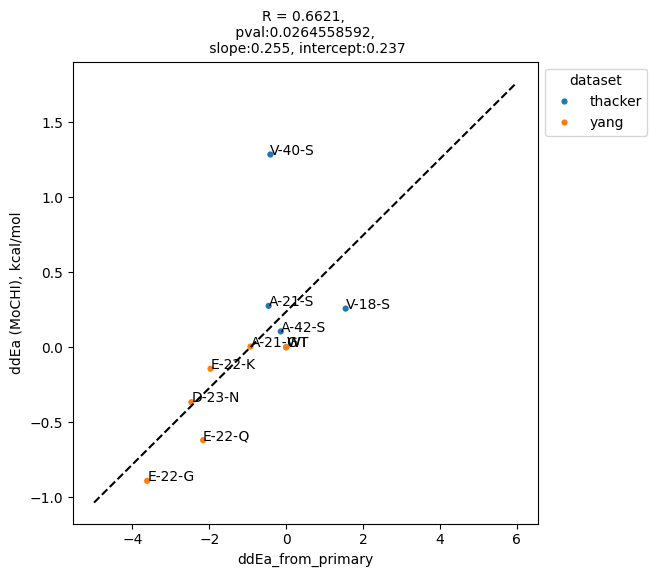

In [153]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,6))

plt.subplots_adjust(wspace=0.4)


curr_df = rate_constants_altogether_df.copy()

curr_df = curr_df[curr_df['ddEa_joint_model'].notna()]

curr_x = np.array(curr_df['ddEa_from_primary'], dtype=float)
curr_y = np.array(curr_df['ddEa_joint_model'], dtype=float)

curr_labels = list(curr_df['mutation_id'])

ax1.set_xlabel('ddEa_from_primary')
ax1.set_ylabel('ddEa (MoCHI), kcal/mol')



x = np.array(list(curr_x))
y = np.array(list(curr_y))

m, b = np.polyfit(x, y, 1)

abline(m,b, -5,6)

sns.scatterplot(curr_df, x = 'ddEa_from_primary', y='ddEa_joint_model', hue='dataset',
                s=20, edgecolor="none",
            #color=curr_df['dataset'].map(colors),
            #scatter_kws={'linewidths': 0}, 
                ax=ax1
           )
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)
    
slope_intercept = np.polyfit(curr_x, curr_y, 1)
print(curr_rate_const_dataset, slope_intercept)


ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],10)) + ', \n slope:' + str(np.round(slope_intercept[0],3)) + ', intercept:' + str(np.round(slope_intercept[1],3)), 
          fontsize=10)
        
plt.savefig('./figures/20240716_predicted_mochi_add_trait_vs_ddEa_exp_primary.pdf', bbox_inches='tight', 
            transparent=True)

[-5  6]


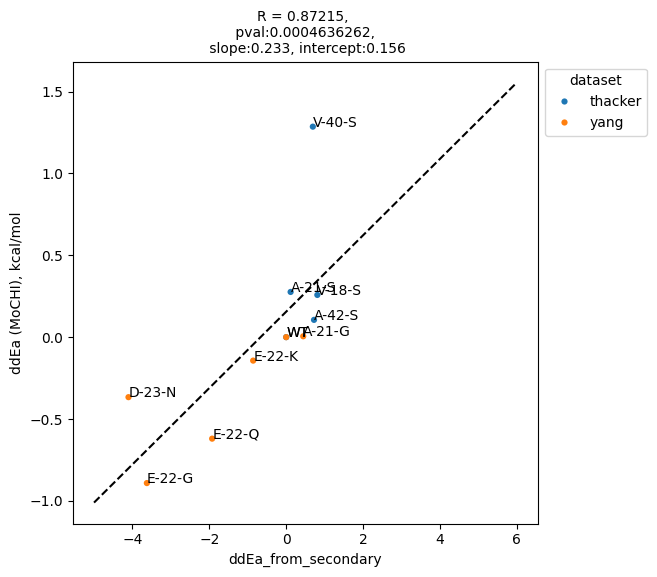

In [154]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,6))

plt.subplots_adjust(wspace=0.4)


curr_df = rate_constants_altogether_df.copy()

curr_df = curr_df[curr_df['ddEa_joint_model'].notna()]

curr_x = np.array(curr_df['ddEa_from_secondary'], dtype=float)
curr_y = np.array(curr_df['ddEa_joint_model'], dtype=float)

curr_labels = list(curr_df['mutation_id'])

ax1.set_xlabel('ddEa_from_secondary')
ax1.set_ylabel('ddEa (MoCHI), kcal/mol')



x = np.array(list(curr_x))
y = np.array(list(curr_y))

m, b = np.polyfit(x, y, 1)

abline(m,b, -5,6)

sns.scatterplot(curr_df, x = 'ddEa_from_secondary', y='ddEa_joint_model', hue='dataset',
                s=20, edgecolor="none",
            #color=curr_df['dataset'].map(colors),
            #scatter_kws={'linewidths': 0}, 
                ax=ax1
           )
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)
    
slope_intercept = np.polyfit(curr_x, curr_y, 1)
#print(curr_rate_const_dataset, slope_intercept)


ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],10)) + ', \n slope:' + str(np.round(slope_intercept[0],3)) + ', intercept:' + str(np.round(slope_intercept[1],3)), 
          fontsize=10)
        
plt.savefig('./figures/20240716_predicted_mochi_add_trait_vs_ddEa_exp_secondary.pdf', bbox_inches='tight', 
            transparent=True)

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

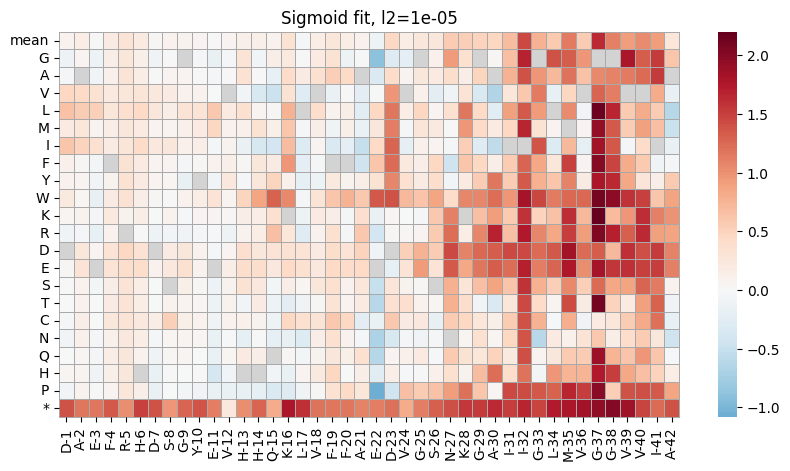

In [155]:
# additive terms from MoCHI, not yet scaled to be in kcal/mol
transformation = 'Sigmoid'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(ddE_df_mean_kcalmol[transformation + '_l2_1e-05'], cmap=cmaps_ddE[transformation + '_l2_1e-05'], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_ddE[transformation + '_l2_1e-05'],
            linewidths=0.5, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title(transformation + ' fit, l2=1e-05')

#plt.savefig('./figures/20240502_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid_l2_1e-05.pdf',
#           bbox_inches = 'tight')

# Plotting all data points [eLife, NNK and Nicking] together (per reference)

In [156]:
rate_constants_all_datasets = {}

for rate_constants_dataset in rate_constants_datasets:
    
    print(rate_constants_dataset)
    
    rate_constants_all_datasets[rate_constants_dataset] = {}


thacker
meisl
yang
ilestoth


In [157]:
datasets

['eLife_doubles', 'NNK_doubles', 'Nicking_doubles']

In [160]:
rate_constants['ilestoth']

,lambda_ilestoth,kappa_ilestoth,k+kn_ilestoth,k+k2_ilestoth,mutation_id,NS_eLife_doubles,sigma_eLife_doubles,NS_NNK_doubles,sigma_NNK_doubles,NS_Nicking_doubles,sigma_Nicking_doubles,ddEa_joint_model,log_lambda_ilestoth,log_kappa_ilestoth,log_k+kn_ilestoth,log_k+k2_ilestoth,ddEa_from_lambda,ddEa_from_kappa,ddEa_from_k+kn,ddEa_from_k+k2
Ab_variant_full,,,,,,,,,,,,,,,,,,,,
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,1.060000e-05,0.000198,8.988800e-02,1.254528e+06,WT,-0.254861,0.465475,0.015158,0.202355,0.123825,0.219638,0,-11.454657,-8.527244,-2.409191,14.042270,0.000000,0.000000,0.000000,0.000000
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA,3.590000e-04,0.006520,1.031048e+02,1.360333e+09,D-23-N,1.025929,0.078701,None,None,1.325114,0.18808,-0.36668,-7.932188,-5.032881,4.635746,21.030995,-2.120741,-2.103819,-4.241482,-4.207639
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA,7.470000e-04,0.010100,4.464072e+02,3.264320e+09,E-22-G,2.377941,0.064394,None,None,2.170153,0.120295,-0.891521,-7.199445,-4.595220,6.101232,21.906317,-2.561897,-2.367318,-5.123793,-4.734636
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA,4.350000e-09,0.000719,1.513800e-08,1.654275e+07,E-22-Q,1.723532,0.117333,None,None,2.148203,0.211482,-0.620139,-19.253090,-7.237649,-18.006058,16.621459,4.695133,-0.776414,9.390265,-1.552829
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA,4.100000e-04,0.002090,1.344800e+02,1.397792e+08,E-22-K,0.532519,0.084528,None,None,0.764645,0.201663,-0.143366,-7.799353,-6.170591,4.901415,18.755575,-2.200715,-1.418848,-4.401431,-2.837697
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA,2.190000e-06,0.000098,3.836880e-03,3.098419e+05,A-21-G,0.136491,0.08765,None,None,0.042437,0.128742,0.005184,-13.031609,-9.226470,-5.563096,12.643818,0.949422,0.420977,1.898843,0.841954
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,1.290000e-05,0.000041,1.331280e-01,5.300768e+04,H-6-R,0.116281,0.061508,None,None,0.089311,0.095847,0.014945,-11.258283,-10.109282,-2.016444,10.878192,-0.118229,0.952484,-0.236457,1.904968
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,4.570000e-05,0.000019,1.670792e+00,1.143072e+04,D-7-N,0.225738,0.07525,None,None,0.123939,0.154079,-0.049426,-9.993412,-10.876349,0.513298,9.344060,-0.879758,1.414305,-1.759516,2.828609


In [161]:
rate_constants['thacker']['log_k+kn_M_vs_WT_thacker'] = [rate_constants['thacker'].loc[idx,'log_k+kn_thacker'] - rate_constants['thacker'].loc[AB_WT,'log_k+kn_thacker'] for idx in list(rate_constants['thacker'].index)]
rate_constants['thacker']['log_k+k2_M_vs_WT_thacker'] = [rate_constants['thacker'].loc[idx,'log_k+k2_thacker'] - rate_constants['thacker'].loc[AB_WT,'log_k+k2_thacker'] for idx in list(rate_constants['thacker'].index)]


rate_constants['yang']['log_kn_M_vs_WT_yang'] = [rate_constants['yang'].loc[idx,'log_kn_yang'] - rate_constants['yang'].loc[AB_WT,'log_kn_yang'] for idx in list(rate_constants['yang'].index)]
rate_constants['yang']['log_k2_M_vs_WT_yang'] = [rate_constants['yang'].loc[idx,'log_k2_yang'] - rate_constants['yang'].loc[AB_WT,'log_k2_yang'] for idx in list(rate_constants['yang'].index)]


rate_constants['ilestoth']['log_k+kn_M_vs_WT_ilestoth'] = [rate_constants['ilestoth'].loc[idx,'log_k+kn_ilestoth'] - rate_constants['ilestoth'].loc[AB_WT,'log_k+kn_ilestoth'] for idx in list(rate_constants['ilestoth'].index)]
rate_constants['ilestoth']['log_k+k2_M_vs_WT_ilestoth'] = [rate_constants['ilestoth'].loc[idx,'log_k+k2_ilestoth'] - rate_constants['ilestoth'].loc[AB_WT,'log_k+k2_ilestoth'] for idx in list(rate_constants['ilestoth'].index)]



In [162]:
rate_constants_all_datasets['thacker']['lambda'] = pd.DataFrame(index = list(rate_constants['thacker'].index)*3,
                                                           data = {'log_lambda': list(rate_constants['thacker']['log_lambda_thacker'])*3,
                                                                   'log_k+kn_M_vs_WT':  list(rate_constants['thacker']['log_k+kn_M_vs_WT_thacker'])*3,
                                                                   'mutation_id': list(rate_constants['thacker']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['thacker']['NS_eLife_doubles']) + list(rate_constants['thacker']['NS_NNK_doubles']) + list(rate_constants['thacker']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['thacker']))] + [datasets[1] for i in range(len(rate_constants['thacker']))] + [datasets[2] for i in range(len(rate_constants['thacker']))]
                                                                  }).dropna()                                                         


rate_constants_all_datasets['thacker']['kappa'] = pd.DataFrame(index = list(rate_constants['thacker'].index)*3,
                                                           data = {'log_kappa': list(rate_constants['thacker']['log_kappa_thacker'])*3,
                                                                   'log_k+k2_M_vs_WT':  list(rate_constants['thacker']['log_k+k2_M_vs_WT_thacker'])*3,
                                                                   'mutation_id': list(rate_constants['thacker']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['thacker']['NS_eLife_doubles']) + list(rate_constants['thacker']['NS_NNK_doubles']) + list(rate_constants['thacker']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['thacker']))] + [datasets[1] for i in range(len(rate_constants['thacker']))] + [datasets[2] for i in range(len(rate_constants['thacker']))]
                                                                  }).dropna()

In [163]:
rate_constants_all_datasets['yang']['kn'] = pd.DataFrame(index = list(rate_constants['yang'].index)*3,
                                                           data = {'log_kn': list(rate_constants['yang']['log_kn_yang'])*3,
                                                                   'log_kn_M_vs_WT':  list(rate_constants['yang']['log_kn_M_vs_WT_yang'])*3,
                                                                   'mutation_id': list(rate_constants['yang']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['yang']['NS_eLife_doubles']) + list(rate_constants['yang']['NS_NNK_doubles']) + list(rate_constants['yang']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['yang']))] + [datasets[1] for i in range(len(rate_constants['yang']))] + [datasets[2] for i in range(len(rate_constants['yang']))]
                                                                  }).dropna()


rate_constants_all_datasets['yang']['k2'] = pd.DataFrame(index = list(rate_constants['yang'].index)*3,
                                                           data = {'log_k2': list(rate_constants['yang']['log_k2_yang'])*3,
                                                                   'log_k2_M_vs_WT':  list(rate_constants['yang']['log_k2_M_vs_WT_yang'])*3,
                                                                   'mutation_id': list(rate_constants['yang']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['yang']['NS_eLife_doubles']) + list(rate_constants['yang']['NS_NNK_doubles']) + list(rate_constants['yang']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['yang']))] + [datasets[1] for i in range(len(rate_constants['yang']))] + [datasets[2] for i in range(len(rate_constants['yang']))]
                                                                  }).dropna()


In [164]:
rate_constants_all_datasets['ilestoth']['lambda'] = pd.DataFrame(index = list(rate_constants['ilestoth'].index)*3,
                                                           data = {'log_lambda': list(rate_constants['ilestoth']['log_lambda_ilestoth'])*3,
                                                                   'log_k+kn_M_vs_WT':  list(rate_constants['ilestoth']['log_k+kn_M_vs_WT_ilestoth'])*3,
                                                                   'mutation_id': list(rate_constants['ilestoth']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['ilestoth']['NS_eLife_doubles']) + list(rate_constants['ilestoth']['NS_NNK_doubles']) + list(rate_constants['ilestoth']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['ilestoth']))] + [datasets[1] for i in range(len(rate_constants['ilestoth']))] + [datasets[2] for i in range(len(rate_constants['ilestoth']))]
                                                                  }).dropna()


rate_constants_all_datasets['ilestoth']['kappa'] = pd.DataFrame(index = list(rate_constants['ilestoth'].index)*3,
                                                           data = {'log_kappa': list(rate_constants['ilestoth']['log_kappa_ilestoth'])*3,
                                                                   'log_k+k2_M_vs_WT':  list(rate_constants['ilestoth']['log_k+k2_M_vs_WT_ilestoth'])*3,
                                                                   'mutation_id': list(rate_constants['ilestoth']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['ilestoth']['NS_eLife_doubles']) + list(rate_constants['ilestoth']['NS_NNK_doubles']) + list(rate_constants['ilestoth']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['ilestoth']))] + [datasets[1] for i in range(len(rate_constants['ilestoth']))] + [datasets[2] for i in range(len(rate_constants['ilestoth']))]
                                                                  }).dropna()


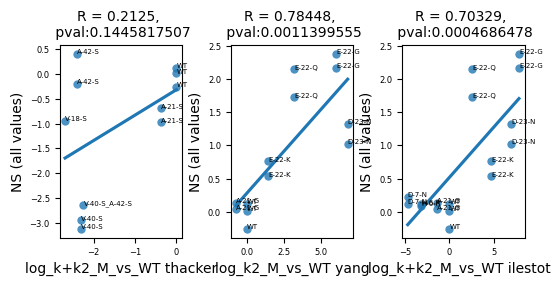

In [167]:
# secondary nucleation - for Fig.1d

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['kappa']
curr_df['log_k+k2_M_vs_WT'] = np.array(curr_df['log_k+k2_M_vs_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+k2_M_vs_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+k2_M_vs_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0,
           )

ax1.set_xlabel('log_k+k2_M_vs_WT ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'yang'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k2']
curr_df['log_k2_M_vs_WT'] = np.array(curr_df['log_k2_M_vs_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k2_M_vs_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k2_M_vs_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0,
           )

ax2.set_xlabel('log_k2_M_vs_WT ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)

    
    
curr_rate_const_dataset = 'ilestoth'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['kappa']
curr_df['log_k+k2_M_vs_WT'] = np.array(curr_df['log_k+k2_M_vs_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+k2_M_vs_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+k2_M_vs_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0,
           )

ax3.set_xlabel('log_k+k2_M_vs_WT ' + curr_rate_const_dataset)
ax3.set_ylabel('NS (all values)')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for ax_i in [ax1,ax2,ax3]:
    ax_i.tick_params(labelsize=6)



for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
#plt.savefig('./figures/20240508_Fig1d_Thacker_Meisl_IlesToth_secondary_nucleation_rates_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
#            transparent=True)

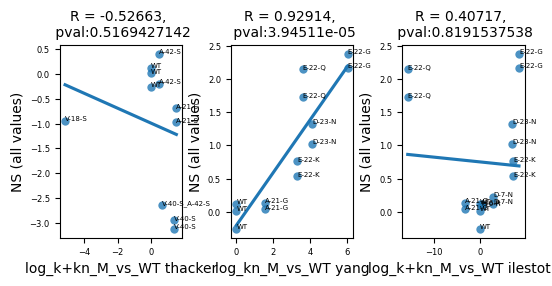

In [169]:
# primary nucleation

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['lambda']
curr_df['log_k+kn_M_vs_WT'] = np.array(curr_df['log_k+kn_M_vs_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+kn_M_vs_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+kn_M_vs_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0
           )

ax1.set_xlabel('log_k+kn_M_vs_WT ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'yang'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['kn']
curr_df['log_kn_M_vs_WT'] = np.array(curr_df['log_kn_M_vs_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_kn_M_vs_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_kn_M_vs_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0
           )

ax2.set_xlabel('log_kn_M_vs_WT ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)

    
    
curr_rate_const_dataset = 'ilestoth'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['lambda']
curr_df['log_k+kn_M_vs_WT'] = np.array(curr_df['log_k+kn_M_vs_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+kn_M_vs_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+kn_M_vs_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0
           )

ax3.set_xlabel('log_k+kn_M_vs_WT ' + curr_rate_const_dataset)
ax3.set_ylabel('NS (all values)')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
for ax_i in [ax1,ax2,ax3]:
    ax_i.tick_params(labelsize=6)


    
    
#plt.savefig('./figures/20240626_SF1_Thacker_Meisl_IlesToth_rates_primary_nucleation_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
#            transparent=True)

### Suppl figure 2d plot: ddEa ~ log(k)

In [173]:
rate_constants['thacker']

,lambda_thacker,kappa_thacker,k+kn_thacker,k+k2_thacker,mutation_id,NS_eLife_doubles,sigma_eLife_doubles,NS_NNK_doubles,sigma_NNK_doubles,NS_Nicking_doubles,...,log_lambda_thacker,log_kappa_thacker,log_k+kn_thacker,log_k+k2_thacker,ddEa_from_lambda,ddEa_from_kappa,ddEa_from_k+kn,ddEa_from_k+k2,log_k+kn_M_vs_WT_thacker,log_k+k2_M_vs_WT_thacker
Ab_variant_full,,,,,,,,,,,,,,,,,,,,,
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA,0.100000,1.230000,5.560000e+08,2.800000e+16,V-18-S_A-21-S,None,None,None,None,None,...,-2.302585,0.207014,20.136279,37.870981,-0.057809,0.925979,-0.116739,1.852135,0.193899,-3.076324
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS,0.125000,1.860000,8.680000e+08,6.410000e+16,V-40-S_A-42-S,None,None,-2.635019,0.950231,None,...,-2.079442,0.620576,20.581702,38.699221,-0.192155,0.676989,-0.384911,1.353484,0.639323,-2.248084
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA,0.194000,4.730000,2.090000e+09,4.140000e+17,A-21-S,-0.687336,0.089124,None,None,-0.973073,...,-1.639897,1.553925,21.460430,40.564642,-0.456788,0.115056,-0.913959,0.230386,1.518050,-0.382663
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS,0.115000,1.720000,7.350000e+08,5.480000e+16,A-42-S,-0.192409,0.069526,0.4094,0.139411,None,...,-2.162823,0.542324,20.415381,38.542467,-0.141954,0.724101,-0.284776,1.447860,0.473001,-2.404839
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA,0.006950,1.490000,2.680000e+06,4.110000e+16,V-18-S,None,None,None,None,-0.945574,...,-4.969014,0.398776,14.801327,38.254785,1.547543,0.810526,3.095227,1.621062,-5.141052,-2.692521
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA,0.180000,1.810000,1.800000e+09,6.070000e+16,V-40-S,-2.956301,0.885222,-3.124643,0.152348,None,...,-1.714798,0.593327,21.311053,38.644720,-0.411693,0.693395,-0.824024,1.386297,1.368673,-2.302585
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.090845,5.726066,4.580000e+08,6.070000e+17,WT,-0.254861,0.465475,0.015158,0.202355,0.123825,...,-2.398604,1.745029,19.942380,40.947305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


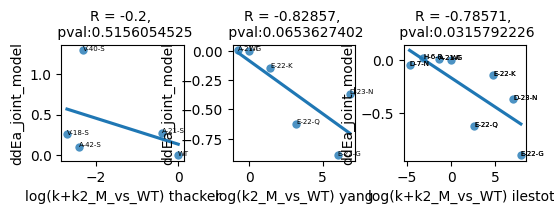

In [176]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,1.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'
rate = 'k+k2_M_vs_WT'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0
           )

ax1.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax1.set_ylabel('ddEa_joint_model')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'yang'
rate = 'k2_M_vs_WT'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0
           )

ax2.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax2.set_ylabel('ddEa_joint_model')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
curr_rate_const_dataset = 'ilestoth'
rate = 'k+k2_M_vs_WT'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0
           )

ax3.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax3.set_ylabel('ddEa_joint_model')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)



for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
plt.savefig('./figures/20240625_Fig2c_Thacker_Meisl_IlesToth_secondary_nucleation_rates_vs_ddEa_joint_model.pdf', bbox_inches='tight', 
            transparent=True)

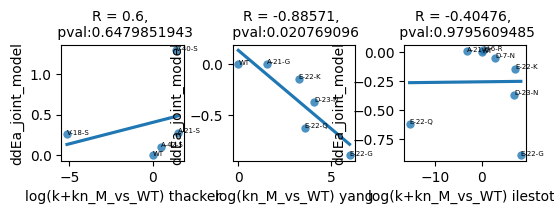

In [178]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,1.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'
rate = 'k+kn_M_vs_WT'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0
           )

ax1.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax1.set_ylabel('ddEa_joint_model')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'yang'
rate = 'kn_M_vs_WT'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0
           )

ax2.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax2.set_ylabel('ddEa_joint_model')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
curr_rate_const_dataset = 'ilestoth'
rate = 'k+kn_M_vs_WT'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0
           )

ax3.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax3.set_ylabel('ddEa_joint_model')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
plt.savefig('./figures/20240625_Fig2c_Thacker_Meisl_IlesToth_primary_nucleation_rates_vs_ddEa_joint_model.pdf', bbox_inches='tight', 
            transparent=True)

## Making a scatterplot of NS vs ddEa for each variant

In [179]:
# to weights_Nucleation['Sigmoid_l2_1e-05'] need to add a column with the full Ab variant for each mutation in 'id' column

def mutation_id2Ab_variant(mutation_id):

    if mutation_id == 'WT':
        result = AB_WT
      
    else:
        curr_wt_aa = mutation_id[0]
        curr_new_aa = mutation_id[-1]
    
        curr_position = int(mutation_id[1:-1])
    
        result = AB_WT[:curr_position-1] + curr_new_aa + AB_WT[curr_position:]
    
    return(result)


In [180]:
weights_Nucleation['Sigmoid_l2_1e-05']['Ab_variant'] = weights_Nucleation['Sigmoid_l2_1e-05']['id'].apply(lambda x: mutation_id2Ab_variant(x))


In [181]:
weights_Nucleation['Sigmoid_l2_1e-05']

,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,...,trait_name,mean_kcal/mol,std_kcal/mol,ci95_kcal/mol,ddEa,variant_occurence_eLife_doubles,variant_occurence_NNK_doubles,variant_occurence_Nicking_doubles,variant_occurence_total_no_duplicates,Ab_variant
0,WT,WT,NaN,NaN,0.371381,0.391369,0.357266,0.348474,0.372521,0.341733,...,Nucleation,0.218317,0.008879,0.034804,-0.218317,0,0,0,0,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
1,D1*,D1*,1.0,1.0,-2.213683,-2.545237,-2.185623,-2.583970,-2.320398,-2.029718,...,Nucleation,-1.398121,0.162563,0.637248,1.398121,1,0,65,65,*AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
2,D1A,D1A,1.0,1.0,0.047495,0.067011,0.077061,0.008786,0.037928,0.066478,...,Nucleation,0.034429,0.016091,0.063075,-0.034429,11,0,298,304,AAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
3,D1C,D1C,1.0,1.0,0.020790,-0.018463,0.064381,0.025494,0.063339,0.093359,...,Nucleation,0.033427,0.023453,0.091934,-0.033427,1,0,203,203,CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
4,D1E,D1E,1.0,1.0,-0.053183,-0.059048,-0.048736,-0.055957,-0.051849,-0.058691,...,Nucleation,-0.033764,0.004320,0.016936,0.033764,210,0,296,415,EAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,A42T,A42T,42.0,42.0,0.145117,0.149020,0.219678,0.186265,0.082041,0.077438,...,Nucleation,0.097084,0.034749,0.136218,-0.097084,154,236,0,341,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIT
837,A42V,A42V,42.0,42.0,0.229532,0.334067,0.283984,0.229813,0.256938,0.260202,...,Nucleation,0.161447,0.022226,0.087125,-0.161447,181,239,0,369,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIV
838,A42W,A42W,42.0,42.0,-1.611651,-1.768430,-1.426433,-1.168376,-1.707580,-1.035545,...,Nucleation,-0.888338,0.169805,0.665637,0.888338,0,188,0,188,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIW
839,A42Y,A42Y,42.0,42.0,-0.916438,-0.897971,-1.026022,-1.039680,-1.146212,-0.833155,...,Nucleation,-0.574368,0.070392,0.275936,0.574368,0,172,0,172,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIY


In [182]:
datasets

['eLife_doubles', 'NNK_doubles', 'Nicking_doubles']

In [183]:
for dataset in datasets:
    print(dataset)
    
    all_variants[dataset]['ddEa_' + dataset] = [None for i in range(len(all_variants[dataset]))]
    all_variants[dataset]['ddEa'] = [None for i in range(len(all_variants[dataset]))]
    
    for idx in list(all_variants[dataset].index):
        
        curr_variant = all_variants[dataset].loc[idx,'aa_seq']
        
        if curr_variant in list(weights_Nucleation['Sigmoid_l2_1e-05']['Ab_variant']):
            all_variants[dataset].loc[idx,'ddEa_' + dataset] = -1* list(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['Ab_variant'] == curr_variant]['mean_kcal/mol'])[0]
            all_variants[dataset].loc[idx,'ddEa'] = -1* list(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['Ab_variant'] == curr_variant]['mean_kcal/mol'])[0]
            
            
    

eLife_doubles
NNK_doubles
Nicking_doubles


In [184]:
for dataset in datasets:
    print(dataset)
    all_variants[dataset]['dataset'] = [dataset for i in range(len(all_variants[dataset]))]
    all_variants[dataset]['fitness_' + dataset] = [fitness for fitness in list(all_variants[dataset]['fitness'])]
    

eLife_doubles
NNK_doubles
Nicking_doubles


In [185]:
all_variants['eLife_doubles']

,merge_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,STOP,STOP_readthrough,mean_count,count_e1_s0,...,nscore_c,sigma_norm_first_toWT,category_sigma,zscore_mode,p.adjust_mode,category_dead,ddEa_eLife_doubles,ddEa,dataset,fitness_eLife_doubles
1,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,1,1,NaN,False,False,210.500000,212.0,...,-0.031054,0.116471,classifiable,-0.080236,9.593123e-01,dead,0.044045,0.044045,eLife_doubles,-0.117352
2,NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,1,1,NaN,False,False,28544.000000,38851.0,...,0.438798,0.018732,classifiable,7.049259,2.372307e-11,not dead,-0.07718,-0.07718,eLife_doubles,0.352500
3,NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,170.000000,190.0,...,0.467821,0.126687,classifiable,1.111265,3.692032e-01,dead,None,None,eLife_doubles,0.381524
4,NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,146.000000,172.0,...,0.139154,0.135707,classifiable,0.308574,8.323199e-01,dead,None,None,eLife_doubles,0.052856
5,NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,64.500000,50.0,...,0.581692,0.213984,classifiable,0.818052,5.286066e-01,dead,None,None,eLife_doubles,0.495394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18645,YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,61.000000,61.0,...,-0.799697,0.269213,classifiable,-0.893918,4.859939e-01,dead,None,None,eLife_doubles,-0.885994
18646,YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,61.000000,NaN,...,-2.159063,0.384886,unclassifiable,-1.688115,1.467904e-01,dead,None,None,eLife_doubles,-2.245360
18647,YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,2,2,NaN,False,False,94.500000,112.0,...,-3.489969,0.220378,classifiable,-4.765656,8.769633e-06,dead,None,None,eLife_doubles,-3.576266
18648,CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,2,1,1,NaN,False,False,161.666667,212.0,...,0.152813,0.108047,classifiable,0.425612,7.613029e-01,dead,-0.033427,-0.033427,eLife_doubles,0.066515


In [186]:
for dataset in datasets:
    print(dataset)
    print(len(all_variants[dataset][['aa_seq','ddEa','fitness','dataset']].dropna()))

eLife_doubles
3081
NNK_doubles
301
Nicking_doubles
600


In [187]:
df_ddEa_NS = pd.concat([all_variants['eLife_doubles'][['aa_seq','ddEa','fitness','dataset']].dropna(),
          all_variants['NNK_doubles'][['aa_seq','ddEa','fitness','dataset']].dropna(),
          all_variants['Nicking_doubles'][['aa_seq','ddEa','fitness','dataset']].dropna()],
         axis=0)
          

In [188]:
df_ddEa_NS

,aa_seq,ddEa,fitness,dataset
1,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.044045,-0.117352,eLife_doubles
2,NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,-0.07718,0.352500,eLife_doubles
189,TAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,-0.014735,-2.818013,eLife_doubles
190,SAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.002045,0.121805,eLife_doubles
191,IAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.603542,-2.404340,eLife_doubles
...,...,...,...,...
53738,*AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,1.398121,-4.499150,Nicking_doubles
53904,YAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.096262,-0.062016,Nicking_doubles
54121,WAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.214893,-0.553207,Nicking_doubles
54316,CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,-0.033427,0.492746,Nicking_doubles


In [189]:
# 2644 is how many times there is WT
np.unique(np.unique(df_ddEa_NS['aa_seq'], return_counts=True)[1])

array([   1,    2,    3, 2644])

In [190]:
df_ddEa_NS['aa_seq'].value_counts()

aa_seq
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA    2644
DAEFRHDSGYEVHHQKLVFFAEDVGSNEGAIIGLMVGGVVIA       3
DAEFRHDSGYEVHHQKLVFFAEDVGSNYGAIIGLMVGGVVIA       3
DAEFRHDSGYEVHHQKLVFFAEDVGSNSGAIIGLMVGGVVIA       3
DAEFRHDSGYEVHHQKLVFFAEDVGSNIGAIIGLMVGGVVIA       3
                                              ... 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIYLMVGGVVIA       1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGWMVGGVVIA       1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIG*MVGGVVIA       1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGGMVGGVVIA       1
WAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       1
Name: count, Length: 834, dtype: int64

In [191]:
df_ddEa_NS['-ddEa'] = -df_ddEa_NS['ddEa']

In [192]:
np.unique(df_ddEa_NS['dataset'])

array(['NNK_doubles', 'Nicking_doubles', 'eLife_doubles'], dtype=object)

In [193]:
df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT]

,aa_seq,ddEa,fitness,dataset,-ddEa
1,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.044045,-0.117352,eLife_doubles,-0.044045
2,NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,-0.07718,0.352500,eLife_doubles,0.07718
189,TAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,-0.014735,-2.818013,eLife_doubles,0.014735
190,SAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.002045,0.121805,eLife_doubles,-0.002045
191,IAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.603542,-2.404340,eLife_doubles,-0.603542
...,...,...,...,...,...
53738,*AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,1.398121,-4.499150,Nicking_doubles,-1.398121
53904,YAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.096262,-0.062016,Nicking_doubles,-0.096262
54121,WAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.214893,-0.553207,Nicking_doubles,-0.214893
54316,CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,-0.033427,0.492746,Nicking_doubles,0.033427


In [194]:
df_ddEa_NS['fitness']

1       -0.117352
2        0.352500
189     -2.818013
190      0.121805
191     -2.404340
           ...   
53738   -4.499150
53904   -0.062016
54121   -0.553207
54316    0.492746
54588   -0.010103
Name: fitness, Length: 3982, dtype: float64

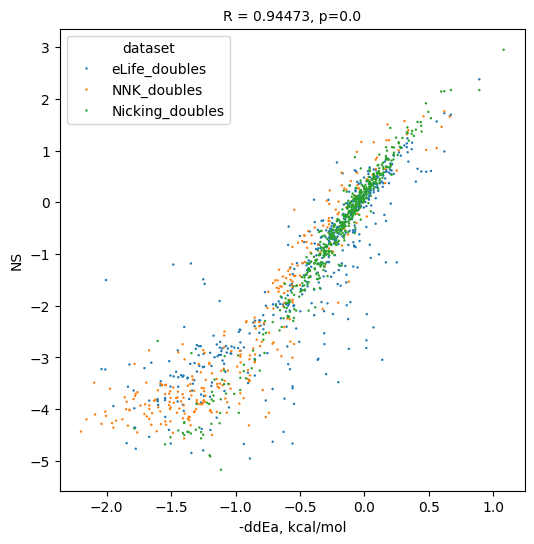

In [195]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,6))

plt.subplots_adjust(wspace=0.4)


sns.scatterplot(df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT], x = '-ddEa', y='fitness', hue='dataset',
                s=3, edgecolor="none",
            #color=curr_df['dataset'].map(colors),
            #scatter_kws={'linewidths': 0}, ax=ax1
           )


curr_x = df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT]['-ddEa']
curr_y = df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT]['fitness']

ax1.set_xlabel('-ddEa, kcal/mol')
ax1.set_ylabel('NS')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', p=' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],10)), 
          fontsize=10)


#for i, txt in enumerate(curr_labels):
#    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
        
plt.savefig('./figures/20240514_NS_all_doubles_vs_ddEa_joint_model_scatter_no_WT.pdf', bbox_inches='tight', 
            transparent=True)

In [196]:
df_ddEa_NS2plot = df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT].copy()

In [197]:
df_ddEa_NS2plot['-ddEa'] = df_ddEa_NS2plot['-ddEa'].astype(float)

In [198]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array((-2,1))
    print(x_vals)
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='black')

[-2  1]


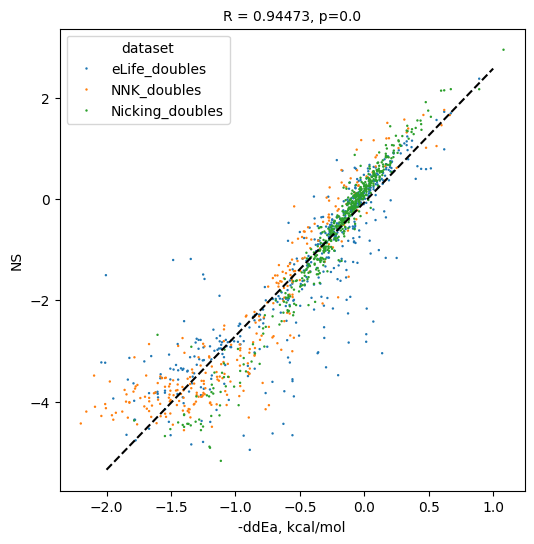

In [199]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,6))

plt.subplots_adjust(wspace=0.4)



curr_x = df_ddEa_NS2plot['-ddEa']
curr_y = df_ddEa_NS2plot['fitness']

ax1.set_xlabel('-ddEa, kcal/mol')
ax1.set_ylabel('NS')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', p=' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],10)), 
          fontsize=10)


x = np.array(list(curr_x))
y = np.array(list(curr_y))

m, b = np.polyfit(x, y, 1)

abline(m,b)


sns.scatterplot(df_ddEa_NS2plot, x = '-ddEa', y='fitness', hue='dataset',
                s=3, edgecolor="none",
            #color=curr_df['dataset'].map(colors),
            #scatter_kws={'linewidths': 0}, ax=ax1
           )


#for i, txt in enumerate(curr_labels):
#    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
        
plt.savefig('./figures/20240514_NS_all_doubles_vs_ddEa_joint_model_scatter_no_WT.pdf', bbox_inches='tight', 
            transparent=True)

In [200]:
df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT].columns

Index(['aa_seq', 'ddEa', 'fitness', 'dataset', '-ddEa'], dtype='object')

In [201]:
#saving for Supplementary table 3

df_ddEa_NS2save = df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT].copy()
df_ddEa_NS2save.columns = ['aa_seq', 'ddEa', 'GR', 'dataset', '-ddEa']

In [202]:
# update names in dataset column
def upd_dataset_names(name_old):
    
    if name_old == 'eLife_doubles':
        result = 'shallow_double_mutants'
    elif name_old == 'NNK_doubles':
        result = 'C_terminal_Ab42_double_mutants'
    elif name_old == 'Nicking_doubles':
        result = 'N_terminal_Ab42_double_mutants'
        
    return(result)

In [203]:
df_ddEa_NS2save['dataset'] = df_ddEa_NS2save['dataset'].apply(lambda x: upd_dataset_names(x))

## Producing differential heatmap (ddEa - (-NS))

In [204]:
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05']

,D-1,A-2,E-3,F-4,R-5,H-6,D-7,S-8,G-9,Y-10,...,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
mean,0.103882,0.169429,0.021102,0.176237,0.296481,0.211324,0.029089,0.103659,0.074594,0.065320,...,0.763549,0.583862,1.144036,0.555530,1.646459,1.101836,0.930434,1.044665,0.907684,0.267220
G,-0.119701,0.059928,-0.122183,0.155388,0.273210,0.125394,-0.088484,0.011455,NaN,-0.035645,...,NaN,1.394856,1.322565,0.966701,NaN,NaN,1.783354,1.331486,1.539978,0.607499
A,-0.034429,NaN,-0.072107,0.118129,0.299875,0.163768,-0.000684,0.066319,0.048261,-0.001086,...,0.962295,0.704062,1.197584,0.641576,1.058879,1.086309,1.139098,1.244563,1.546236,NaN
V,0.461832,0.432284,0.340384,0.214031,0.269688,0.284629,0.231658,0.179811,0.103366,0.093800,...,1.145424,-0.171591,0.479416,NaN,1.285608,1.121802,NaN,NaN,0.815993,-0.161447
L,0.641402,0.563584,0.529227,0.266033,0.376285,0.432850,0.255755,0.160883,0.300386,0.313313,...,0.936964,NaN,1.038536,-0.072776,2.156709,1.669760,0.577498,0.815200,0.572480,-0.620313
M,0.196217,0.272486,0.069836,0.146869,0.258301,0.188453,0.049938,0.061914,0.118189,0.209153,...,0.323637,0.053965,NaN,0.056243,1.927560,1.351779,0.560566,0.896312,0.665332,-0.479129
I,0.603542,0.506125,0.361030,0.182046,0.288060,0.424054,0.236218,0.258268,0.116144,0.146601,...,1.370139,-0.310746,0.709471,-0.191319,1.834677,1.362958,-0.035779,0.418822,NaN,-0.162904
F,0.111876,0.029937,-0.058595,NaN,0.324749,0.198976,0.068263,0.064392,-0.042781,0.028365,...,0.852814,0.273586,1.504866,0.058850,2.004759,1.483052,0.809109,0.579608,-0.088316,-0.041485
Y,0.096262,0.066753,-0.071505,0.080424,0.341684,0.194762,0.065374,0.043734,-0.166671,NaN,...,0.788747,0.598253,1.089803,0.177152,1.790839,1.653306,0.851876,0.286320,0.140005,0.574368
W,0.214893,0.046681,-0.167809,0.182460,0.332840,0.138308,0.028336,0.021277,0.098096,0.170297,...,1.460660,1.142606,1.257964,1.262330,2.096475,1.958122,1.583703,1.504526,0.620594,0.888338


In [206]:
weights_Nucleation['Sigmoid_l2_1e-05']

,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,...,trait_name,mean_kcal/mol,std_kcal/mol,ci95_kcal/mol,ddEa,variant_occurence_eLife_doubles,variant_occurence_NNK_doubles,variant_occurence_Nicking_doubles,variant_occurence_total_no_duplicates,Ab_variant
0,WT,WT,NaN,NaN,0.371381,0.391369,0.357266,0.348474,0.372521,0.341733,...,Nucleation,0.218317,0.008879,0.034804,-0.218317,0,0,0,0,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
1,D1*,D1*,1.0,1.0,-2.213683,-2.545237,-2.185623,-2.583970,-2.320398,-2.029718,...,Nucleation,-1.398121,0.162563,0.637248,1.398121,1,0,65,65,*AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
2,D1A,D1A,1.0,1.0,0.047495,0.067011,0.077061,0.008786,0.037928,0.066478,...,Nucleation,0.034429,0.016091,0.063075,-0.034429,11,0,298,304,AAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
3,D1C,D1C,1.0,1.0,0.020790,-0.018463,0.064381,0.025494,0.063339,0.093359,...,Nucleation,0.033427,0.023453,0.091934,-0.033427,1,0,203,203,CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
4,D1E,D1E,1.0,1.0,-0.053183,-0.059048,-0.048736,-0.055957,-0.051849,-0.058691,...,Nucleation,-0.033764,0.004320,0.016936,0.033764,210,0,296,415,EAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,A42T,A42T,42.0,42.0,0.145117,0.149020,0.219678,0.186265,0.082041,0.077438,...,Nucleation,0.097084,0.034749,0.136218,-0.097084,154,236,0,341,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIT
837,A42V,A42V,42.0,42.0,0.229532,0.334067,0.283984,0.229813,0.256938,0.260202,...,Nucleation,0.161447,0.022226,0.087125,-0.161447,181,239,0,369,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIV
838,A42W,A42W,42.0,42.0,-1.611651,-1.768430,-1.426433,-1.168376,-1.707580,-1.035545,...,Nucleation,-0.888338,0.169805,0.665637,0.888338,0,188,0,188,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIW
839,A42Y,A42Y,42.0,42.0,-0.916438,-0.897971,-1.026022,-1.039680,-1.146212,-0.833155,...,Nucleation,-0.574368,0.070392,0.275936,0.574368,0,172,0,172,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIY


In [207]:
# adding mean(NS) for every variant

weights_Nucleation['Sigmoid_l2_1e-05']['NS_mean'] = [None for i in range(len(weights_Nucleation['Sigmoid_l2_1e-05']))]
weights_Nucleation['Sigmoid_l2_1e-05']['NS_datasets'] = [None for i in range(len(weights_Nucleation['Sigmoid_l2_1e-05']))]


for idx in list(weights_Nucleation['Sigmoid_l2_1e-05'].index):
    
    #print(idx)
    
    curr_variant = weights_Nucleation['Sigmoid_l2_1e-05'].loc[idx,'Ab_variant']
    
    curr_df_ddEa_NS_subset = df_ddEa_NS[df_ddEa_NS['aa_seq'] == curr_variant]
    
    weights_Nucleation['Sigmoid_l2_1e-05'].loc[idx, 'NS_mean'] = np.mean(curr_df_ddEa_NS_subset['fitness'])
    weights_Nucleation['Sigmoid_l2_1e-05'].loc[idx, 'NS_datasets'] = str(list(np.unique(curr_df_ddEa_NS_subset['dataset'])))
    
    

In [208]:
# we should be comparing -NS to ddEa
weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean'] = -weights_Nucleation['Sigmoid_l2_1e-05']['NS_mean']

In [209]:
# normalise to the same scale to compare - using this

weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm'] = [(elem - np.mean(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa'])) / np.std(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa']) for elem in weights_Nucleation['Sigmoid_l2_1e-05']['ddEa']]
weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean_norm'] = [(elem - np.mean(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean'])) / np.std(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean']) for elem in weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean']]



/tmp/ipykernel_3924017/3322208127.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean'])
/tmp/ipykernel_3924017/3322208127.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa'])


<Axes: xlabel='ddEa', ylabel='Density'>

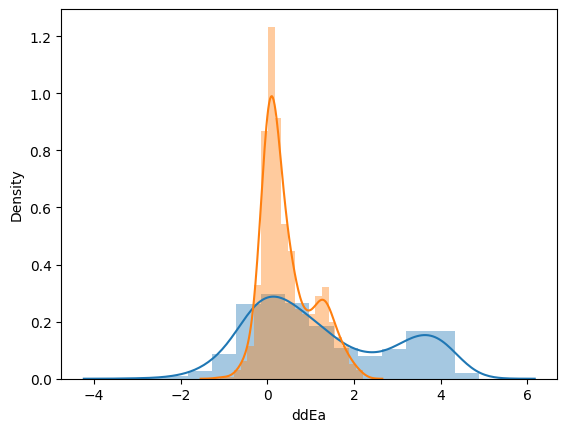

In [210]:
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean'])
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa'])

/tmp/ipykernel_3924017/1265821355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean_norm'])
/tmp/ipykernel_3924017/1265821355.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm'])


<Axes: xlabel='ddEa_norm', ylabel='Density'>

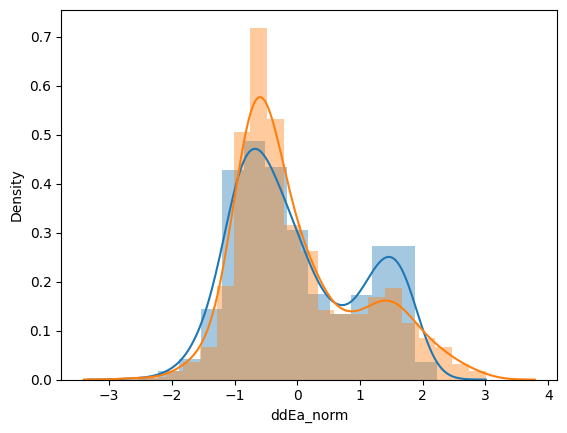

In [211]:
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean_norm'])
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm'])

In [213]:
weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'] = weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm'] - weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean_norm']



In [214]:
weights_Nucleation['Sigmoid_l2_1e-05'].columns

Index(['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa',
       'variant_occurence_eLife_doubles', 'variant_occurence_NNK_doubles',
       'variant_occurence_Nicking_doubles',
       'variant_occurence_total_no_duplicates', 'Ab_variant', 'NS_mean',
       'NS_datasets', 'neg_NS_mean', 'ddEa_norm', 'neg_NS_mean_norm',
       'ddEa_norm_minus_neg_NS_mean_norm'],
      dtype='object')

In [217]:
df_ddEa_NS2save

,aa_seq,ddEa,GR,dataset,-ddEa
1,KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.044045,-0.117352,shallow_double_mutants,-0.044045
2,NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,-0.07718,0.352500,shallow_double_mutants,0.07718
189,TAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,-0.014735,-2.818013,shallow_double_mutants,0.014735
190,SAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.002045,0.121805,shallow_double_mutants,-0.002045
191,IAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.603542,-2.404340,shallow_double_mutants,-0.603542
...,...,...,...,...,...
53738,*AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,1.398121,-4.499150,N_terminal_Ab42_double_mutants,-1.398121
53904,YAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.096262,-0.062016,N_terminal_Ab42_double_mutants,-0.096262
54121,WAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,0.214893,-0.553207,N_terminal_Ab42_double_mutants,-0.214893
54316,CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,-0.033427,0.492746,N_terminal_Ab42_double_mutants,0.033427


/tmp/ipykernel_3924017/80585790.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'])


<Axes: xlabel='ddEa_norm_minus_neg_NS_mean_norm', ylabel='Density'>

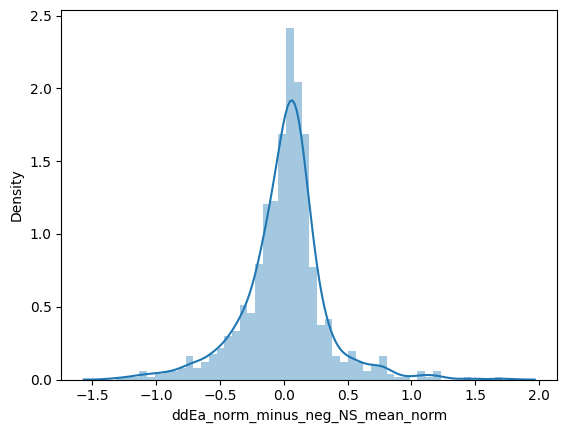

In [218]:
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'])

In [222]:
# parse into heatmap format table

diff_df_ddEa_norm_minus_neg_NS_mean_norm = {}

for transformation in transformations:
    #print(transformation)
    diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [223]:
# populate the ddE_df table according to weights_Nucleation

for transformation in transformations:

    for idx in list(weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].index):

        curr_mutation_id = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'id']

        # continue if not WT
        if curr_mutation_id != 'WT':
            # position (1-42) of mutation in Ab sequence
            curr_mutation_pos = curr_mutation_id[1:-1]
            # aa introduced by the mutation
            curr_new_aa = curr_mutation_id[-1]

            curr_ddEa_norm_minus_neg_NS_mean_norm_value = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'ddEa_norm_minus_neg_NS_mean_norm']

            diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value].loc[curr_new_aa, list(diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_norm_minus_neg_NS_mean_norm_value


In [224]:
# make sure values are float
for transformation in transformations:
    for col in list(diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns):
        diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value][col] = diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value][col].astype(float)


In [225]:
cmaps_diff_df = {}
masks_diff_df = {}

for transformation in transformations:
    #print(transformation)
    masks_diff_df[transformation + '_l2_' + l2_regularisation_factor_value] = diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value].isnull()

    cmaps_diff_df[transformation + '_l2_' + l2_regularisation_factor_value] = matplotlib.colormaps.get('RdBu_r')
    cmaps_diff_df[transformation + '_l2_' + l2_regularisation_factor_value].set_bad("lightgrey")

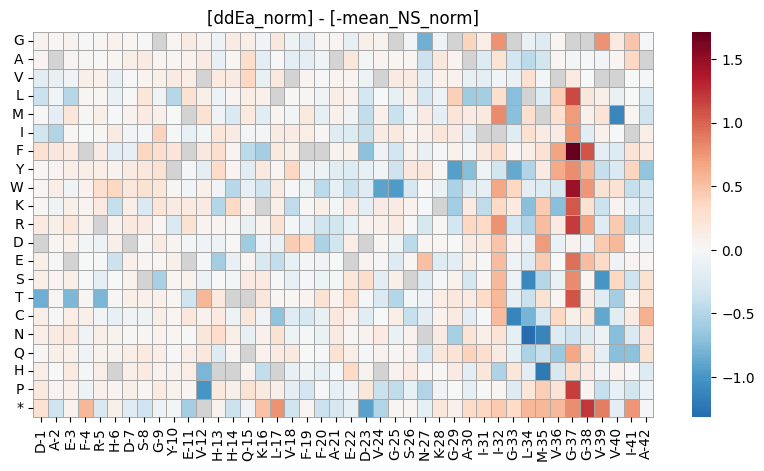

In [226]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_1e-05'], cmap=cmaps_diff_df[transformation + '_l2_1e-05'], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_diff_df[transformation + '_l2_1e-05'],
            linewidths=0.5, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('[ddEa_norm] - [-mean_NS_norm]')

plt.savefig('./figures/20240516_ddEa_norm_vs_neg_mean_NS_norm_heatmap.pdf',
           bbox_inches = 'tight')

In [227]:
# parse into heatmap format table
df_ddEa_norm = {}

for transformation in transformations:
    #print(transformation)
    df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [228]:
# populate the ddE_df table according to weights_Nucleation

for transformation in transformations:

    for idx in list(weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].index):

        curr_mutation_id = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'id']

        # continue if not WT
        if curr_mutation_id != 'WT':
            # position (1-42) of mutation in Ab sequence
            curr_mutation_pos = curr_mutation_id[1:-1]
            # aa introduced by the mutation
            curr_new_aa = curr_mutation_id[-1]

            curr_ddEa_norm_value = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'ddEa_norm']

            df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value].loc[curr_new_aa, 
                                                                                       list(df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_norm_value


In [229]:
# make sure values are float
for transformation in transformations:
    for col in list(df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns):
        df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value][col] = df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value][col].astype(float)


In [230]:
cmaps_df_ddEa_norm = {}
masks_df_ddEa_norm = {}

for transformation in transformations:
    #print(transformation)
    masks_df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value] = df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value].isnull()

    cmaps_df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value] = matplotlib.colormaps.get('RdBu_r')
    cmaps_df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value].set_bad("lightgrey")

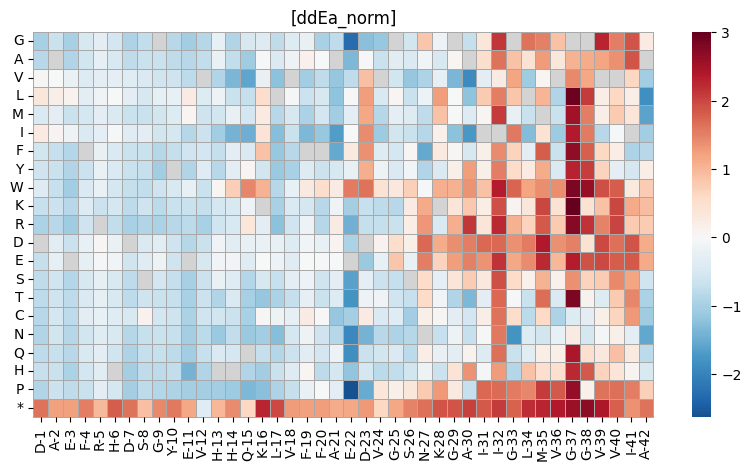

In [231]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(df_ddEa_norm[transformation + '_l2_1e-05'], cmap=cmaps_df_ddEa_norm[transformation + '_l2_1e-05'], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_df_ddEa_norm[transformation + '_l2_1e-05'],
            linewidths=0.5, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('[ddEa_norm]')

plt.savefig('./figures/20240610_ddEa_norm_heatmap.pdf',
           bbox_inches = 'tight')

In [232]:
# parse into heatmap format table
df_neg_NS_norm = {}

for transformation in transformations:
    #print(transformation)
    df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [233]:
# populate the ddE_df table according to weights_Nucleation

for transformation in transformations:

    for idx in list(weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].index):

        curr_mutation_id = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'id']

        # continue if not WT
        if curr_mutation_id != 'WT':
            # position (1-42) of mutation in Ab sequence
            curr_mutation_pos = curr_mutation_id[1:-1]
            # aa introduced by the mutation
            curr_new_aa = curr_mutation_id[-1]

            curr_neg_norm_value = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'neg_NS_mean_norm']

            df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value].loc[curr_new_aa, 
                                                                                       list(df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns)[int(curr_mutation_pos) - 1]] = curr_neg_norm_value


In [234]:
# make sure values are float
for transformation in transformations:
    for col in list(df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns):
        df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value][col] = df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value][col].astype(float)


In [235]:
cmaps_df_neg_NS_norm = {}
masks_df_neg_NS_norm = {}

for transformation in transformations:
    #print(transformation)
    masks_df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value] = df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value].isnull()

    cmaps_df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value] = matplotlib.colormaps.get('RdBu_r')
    cmaps_df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value].set_bad("lightgrey")

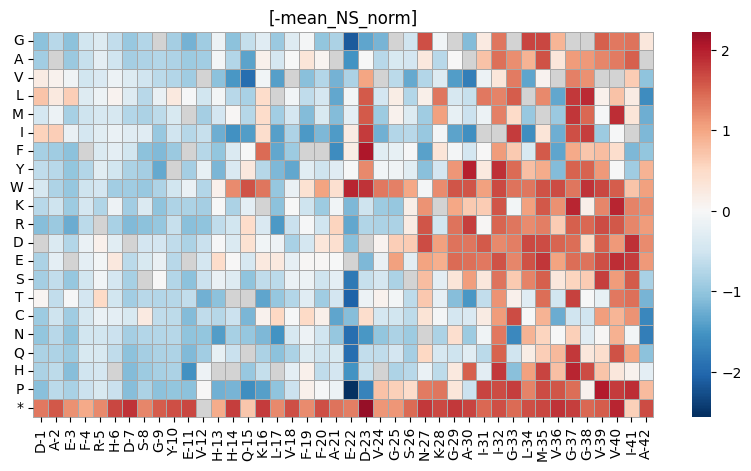

In [236]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(df_neg_NS_norm[transformation + '_l2_1e-05'], cmap=cmaps_df_neg_NS_norm[transformation + '_l2_1e-05'], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_df_neg_NS_norm[transformation + '_l2_1e-05'],
            linewidths=0.5, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('[-mean_NS_norm]')

plt.savefig('./figures/20240610_neg_NS_norm_heatmap.pdf',
           bbox_inches = 'tight')

In [237]:
# add mean and put it at the top
previous_rows = list(diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05'].index)
diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05'].loc['mean'] = diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05'].loc[all_aa[:-1],:].mean()
diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05'] = diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05'].loc[['mean'] + previous_rows]

In [238]:
diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05']

,D-1,A-2,E-3,F-4,R-5,H-6,D-7,S-8,G-9,Y-10,...,G-33,L-34,M-35,V-36,G-37,G-38,V-39,V-40,I-41,A-42
mean,-0.019943,-0.003880,0.017857,0.010758,0.013237,-0.016118,0.057547,0.086787,0.093427,0.013632,...,-0.230440,-0.314910,-0.064083,0.032449,0.720723,0.231336,-0.093564,-0.116205,-0.047887,-0.039399
G,0.059041,0.036116,0.063393,-0.000974,0.044194,0.074567,0.041057,0.009408,NaN,0.045239,...,NaN,-0.108241,-0.214868,0.023401,NaN,NaN,0.768396,0.159960,0.480836,-0.013441
A,0.057512,NaN,0.047373,0.022104,0.003384,0.031608,0.105016,0.146671,0.055509,0.031568,...,-0.310763,-0.452744,-0.330390,0.032839,-0.047254,-0.020075,-0.049211,0.043144,0.358958,NaN
V,-0.198048,-0.125910,-0.074642,0.094000,0.081375,-0.131060,-0.024043,0.048180,0.099643,0.128982,...,-0.118316,0.272700,-0.037168,NaN,0.157922,-0.010217,NaN,NaN,-0.010947,-0.031217
L,-0.379154,-0.055028,-0.483273,0.012756,0.015580,-0.111731,0.000995,0.202671,-0.062634,-0.490151,...,-0.711358,NaN,-0.217163,0.415553,1.130526,0.194995,0.101914,-0.110052,-0.004191,-0.235132
M,-0.000955,-0.166173,0.204907,0.014771,0.098063,-0.016444,0.075273,0.151364,0.094400,-0.008479,...,-0.710701,0.286640,NaN,0.280089,0.723256,0.082381,0.224294,-1.103047,0.040078,-0.340118
I,-0.329638,-0.519104,0.043244,-0.010108,0.011037,0.145196,-0.049239,-0.025221,0.388869,0.000502,...,-0.211578,0.273951,0.131069,0.143704,0.734225,-0.200113,0.091867,-0.021206,NaN,0.108890
F,0.280734,0.185827,0.161775,NaN,0.149038,-0.170819,-0.147588,0.370369,0.285993,0.218641,...,0.039843,0.102298,0.259547,0.688826,1.712378,1.076747,-0.165508,-0.227473,0.227362,0.154226
Y,0.039494,0.048718,0.109618,0.106944,0.110936,0.058341,0.151390,0.182522,0.252897,NaN,...,-0.870840,-0.516981,0.149412,0.645742,0.793292,0.569408,-0.414555,-0.260972,0.378962,-0.666318
W,0.023182,0.115474,-0.080870,0.071141,0.284113,0.354563,0.185708,0.235702,0.200159,0.016238,...,0.344290,-0.189717,-0.227975,-0.274772,1.461236,0.745580,0.240777,0.263618,-0.414819,-0.291444


In [239]:
cmaps_diff_df = {}
masks_diff_df = {}

for transformation in transformations:
    #print(transformation)
    masks_diff_df[transformation + '_l2_' + l2_regularisation_factor_value] = diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value].isnull()

    cmaps_diff_df[transformation + '_l2_' + l2_regularisation_factor_value] = matplotlib.colormaps.get('RdBu_r')
    cmaps_diff_df[transformation + '_l2_' + l2_regularisation_factor_value].set_bad("lightgrey")

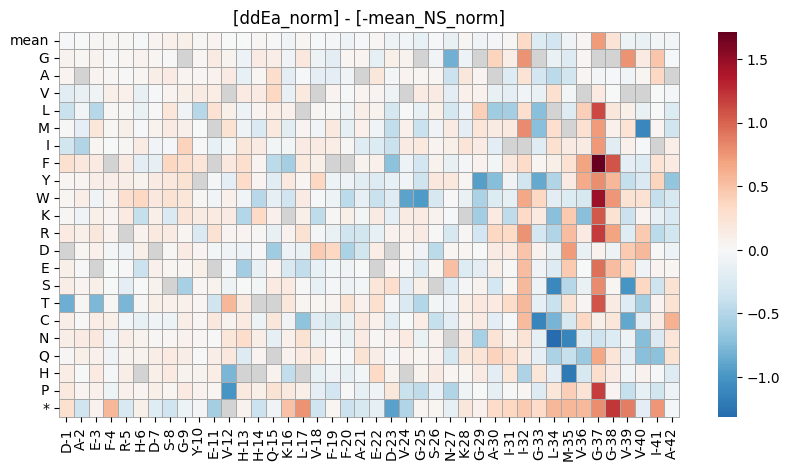

In [240]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_1e-05'], cmap=cmaps_diff_df[transformation + '_l2_1e-05'], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_diff_df[transformation + '_l2_1e-05'],
            linewidths=0.5, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('[ddEa_norm] - [-mean_NS_norm]')

plt.savefig('./figures/20240703_ddEa_norm_vs_neg_mean_NS_norm_heatmap.pdf',
           bbox_inches = 'tight')

In [241]:
ddEa_norm_minus_neg_NS_mean_norm = [elem for elem in weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'] if str(elem) != 'nan']

cutoff_max = 1 #np.quantile(ddEa_norm_minus_neg_NS_mean_norm, q=0.99)
cutoff_min = -1 #np.quantile(ddEa_norm_minus_neg_NS_mean_norm, q=0.01)

In [242]:
cutoff_max = np.quantile(ddEa_norm_minus_neg_NS_mean_norm, q=0.99)
cutoff_min = np.quantile(ddEa_norm_minus_neg_NS_mean_norm, q=0.01)

print('cutoff_max:', cutoff_max)
print('cutoff_min:', cutoff_min)


cutoff_max: 1.0202486060545233
cutoff_min: -0.9612635965324557


In [243]:
weights_Nucleation['Sigmoid_l2_1e-05'][(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'] > cutoff_max)]

,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,...,variant_occurence_NNK_doubles,variant_occurence_Nicking_doubles,variant_occurence_total_no_duplicates,Ab_variant,NS_mean,NS_datasets,neg_NS_mean,ddEa_norm,neg_NS_mean_norm,ddEa_norm_minus_neg_NS_mean_norm
725,G37F,G37F,37.0,37.0,-3.283918,-3.840109,-3.246306,-3.397654,-3.470367,-3.393270,...,232,0,232,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVFGVVIA,-2.816598,"['NNK_doubles', 'eLife_doubles']",2.816598,2.670068,0.957690,1.712378
728,G37K,G37K,37.0,37.0,-3.727061,-3.694291,-3.599035,-3.527509,-3.303558,-3.522774,...,227,0,227,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVKGVVIA,-4.432255,['NNK_doubles'],4.432255,3.004429,1.943601,1.060828
729,G37L,G37L,37.0,37.0,-3.618431,-3.199268,-3.342215,-3.326509,-3.378123,-3.826239,...,270,0,270,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVLGVVIA,-4.197256,['NNK_doubles'],4.197256,2.930726,1.800199,1.130526
732,G37P,G37P,37.0,37.0,-3.308399,-3.528811,-3.416836,-3.202698,-2.998166,-3.255577,...,249,0,249,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVPGVVIA,-3.603035,['NNK_doubles'],3.603035,2.617936,1.437592,1.180345
734,G37R,G37R,37.0,37.0,-3.483965,-3.148991,-3.366560,-3.886751,-3.717236,-3.774546,...,264,0,286,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVRGVVIA,-3.754826,"['NNK_doubles', 'eLife_doubles']",3.754826,2.730772,1.530218,1.200554
736,G37T,G37T,37.0,37.0,-3.658756,-3.300708,-3.933917,-3.630251,-3.318112,-3.467153,...,237,0,237,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVTGVVIA,-4.102111,['NNK_doubles'],4.102111,2.815347,1.742139,1.073207
738,G37W,G37W,37.0,37.0,-3.843828,-3.746850,-3.307754,-3.536465,-3.270027,-3.783327,...,228,0,228,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVWGVVIA,-3.485982,['NNK_doubles'],3.485982,2.827399,1.366163,1.461236
740,G38*,G38*,38.0,38.0,-3.460960,-3.421925,-3.706717,-3.273619,-2.947439,-3.735375,...,222,0,222,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVG*VVIA,-3.640454,"['NNK_doubles', 'eLife_doubles']",3.640454,2.679768,1.460426,1.219342
745,G38F,G38F,38.0,38.0,-2.169121,-2.353373,-2.513703,-2.868635,-2.869389,-2.364705,...,212,0,212,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGFVVIA,-2.391648,"['NNK_doubles', 'eLife_doubles']",2.391648,1.775122,0.698375,1.076747


In [244]:
weights_Nucleation['Sigmoid_l2_1e-05'][(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'] < cutoff_min)]

,id,id_ref,Pos,Pos_ref,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,...,variant_occurence_NNK_doubles,variant_occurence_Nicking_doubles,variant_occurence_total_no_duplicates,Ab_variant,NS_mean,NS_datasets,neg_NS_mean,ddEa_norm,neg_NS_mean_norm,ddEa_norm_minus_neg_NS_mean_norm
233,V12P,V12P,12.0,12.0,0.270248,0.279282,0.244974,0.175946,0.085674,0.114450,...,0,11,11,DAEFRHDSGYEPHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA,-1.249218,"['Nicking_doubles', 'eLife_doubles']",1.249218,-1.006599,0.001238,-1.007837
498,G25W,G25W,25.0,25.0,-1.080932,-1.082174,-1.046879,-1.008553,-0.965967,-1.039781,...,0,268,268,DAEFRHDSGYEVHHQKLVFFAEDVWSNKGAIIGLMVGGVVIA,-3.341265,"['Nicking_doubles', 'eLife_doubles']",3.341265,0.307566,1.277854,-0.970288
642,G33C,G33C,33.0,33.0,-0.676291,-1.278804,-1.240811,-1.392062,-1.025742,-0.860965,...,166,0,166,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIICLMVGGVVIA,-3.99135,"['NNK_doubles', 'eLife_doubles']",3.99135,0.544359,1.674551,-1.130192
671,L34N,L34N,34.0,34.0,-0.614277,-0.367545,-0.380615,-0.294573,-0.297958,-0.353970,...,189,0,189,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGNMVGGVVIA,-2.709581,"['NNK_doubles', 'eLife_doubles']",2.709581,-0.420938,0.892386,-1.313324
675,L34S,L34S,34.0,34.0,-0.931436,-0.987392,-0.931397,-1.187664,-0.882890,-0.776402,...,246,0,246,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGSMVGGVVIA,-3.317999,"['NNK_doubles', 'eLife_doubles']",3.317999,0.168517,1.263657,-1.095139
687,M35H,M35H,35.0,35.0,-1.097315,-0.846718,-1.095002,-1.172856,-1.253472,-1.426703,...,178,0,178,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLHVGGVVIA,-4.070707,['NNK_doubles'],4.070707,0.500579,1.722976,-1.222398
691,M35N,M35N,35.0,35.0,-0.154176,-0.462187,-0.337056,-0.414996,-0.171930,-0.065591,...,214,0,214,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLNVGGVVIA,-2.183778,"['NNK_doubles', 'eLife_doubles']",2.183778,-0.561013,0.571528,-1.132542
776,V39S,V39S,39.0,39.0,-1.526624,-1.402486,-1.382038,-1.392608,-1.634983,-1.411504,...,232,0,232,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGSVIA,-4.150305,"['NNK_doubles', 'eLife_doubles']",4.150305,0.755205,1.771549,-1.016343
791,V40M,V40M,40.0,40.0,-1.605967,-1.508951,-2.043410,-1.675011,-1.360038,-1.080618,...,144,0,144,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVMIA,-4.314369,['NNK_doubles'],4.314369,0.768617,1.871664,-1.103047


In [247]:
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].columns[28:]

Index(['G-29', 'A-30', 'I-31', 'I-32', 'G-33', 'L-34', 'M-35', 'V-36', 'G-37',
       'G-38', 'V-39', 'V-40', 'I-41', 'A-42'],
      dtype='object')

In [248]:
positions_APR1 = list(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].columns[16:21])
positions_APR2 = list(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].columns[28:])


ddEa_APR1 = np.array(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc[all_aa,positions_APR1])
ddEa_APR1 = [x for xs in ddEa_APR1 for x in xs]
ddEa_APR1 = [elem for elem in ddEa_APR1 if str(elem) != 'nan']

ddEa_APR2 = np.array(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc[all_aa,positions_APR2])
ddEa_APR2 = [x for xs in ddEa_APR2 for x in xs]
ddEa_APR2 = [elem for elem in ddEa_APR2 if str(elem) != 'nan']

In [249]:
scipy.stats.mannwhitneyu(ddEa_APR2, ddEa_APR1, alternative='greater')

MannwhitneyuResult(statistic=23200.0, pvalue=8.61429697758993e-23)

In [250]:
# produce a quick barplot too
df_barplot = pd.DataFrame(data = {'ddEa': ddEa_APR1 + ddEa_APR2,
                                 'region': ['APR1']*len(ddEa_APR1) + ['APR2']*len(ddEa_APR2)})

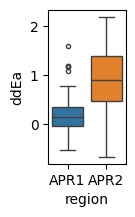

In [251]:
fig = plt.figure(figsize=(1, 2))

sns.boxplot(df_barplot, x = 'region', y = 'ddEa', hue = 'region',
           flierprops={"marker": "."}
           )

plt.savefig('./figures/20240614_APR1_vs_APR2_ddEa.pdf',
           bbox_inches = 'tight')